In [78]:
# general usage packages - data pre-processing & plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# scipy library used to integrate the ODEs
from scipy.integrate import odeint

# libraries used to fit the models
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution

# assess quality of fit
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# package to handle datetime data
import datetime

sns.set_context('notebook')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# to clean garbage in kernel
import gc


# fix needed for python 3.8
import multiprocessing
multiprocessing.set_start_method("fork")

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-and-cleaning-dataset" data-toc-modified-id="Loading-and-cleaning-dataset-1">Loading and cleaning dataset</a></span></li><li><span><a href="#Prepare-data-for-fit" data-toc-modified-id="Prepare-data-for-fit-2">Prepare data for fit</a></span><ul class="toc-item"><li><span><a href="#remove-baseline" data-toc-modified-id="remove-baseline-2.1">remove baseline</a></span></li><li><span><a href="#function-to-prepare-data-for-fit" data-toc-modified-id="function-to-prepare-data-for-fit-2.2">function to prepare data for fit</a></span></li></ul></li><li><span><a href="#Simple-SIR" data-toc-modified-id="Simple-SIR-3">Simple SIR</a></span><ul class="toc-item"><li><span><a href="#model-definition" data-toc-modified-id="model-definition-3.1">model definition</a></span></li><li><span><a href="#testing-SIR-before-fit" data-toc-modified-id="testing-SIR-before-fit-3.2">testing SIR before fit</a></span></li><li><span><a href="#run-SIR-fit" data-toc-modified-id="run-SIR-fit-3.3">run SIR fit</a></span><ul class="toc-item"><li><span><a href="#global-optimization" data-toc-modified-id="global-optimization-3.3.1">global optimization</a></span></li><li><span><a href="#local-optimization" data-toc-modified-id="local-optimization-3.3.2">local optimization</a></span></li></ul></li><li><span><a href="#plot-fitted-parameters" data-toc-modified-id="plot-fitted-parameters-3.4">plot fitted parameters</a></span></li><li><span><a href="#plot-data-VS-best-fit" data-toc-modified-id="plot-data-VS-best-fit-3.5">plot data VS best fit</a></span></li></ul></li><li><span><a href="#Rats-Fleas-Humans-model" data-toc-modified-id="Rats-Fleas-Humans-model-4">Rats-Fleas-Humans model</a></span><ul class="toc-item"><li><span><a href="#model-definition" data-toc-modified-id="model-definition-4.1">model definition</a></span></li><li><span><a href="#model-fitting" data-toc-modified-id="model-fitting-4.2">model fitting</a></span><ul class="toc-item"><li><span><a href="#data-to-fit-and-pars-init.-cond." data-toc-modified-id="data-to-fit-and-pars-init.-cond.-4.2.1">data to fit and pars init. cond.</a></span></li><li><span><a href="#global-optim" data-toc-modified-id="global-optim-4.2.2">global optim</a></span></li><li><span><a href="#local-optim" data-toc-modified-id="local-optim-4.2.3">local optim</a></span></li></ul></li><li><span><a href="#plot-and-save-fitted-pars-with-cov" data-toc-modified-id="plot-and-save-fitted-pars-with-cov-4.3">plot and save fitted pars with cov</a></span></li><li><span><a href="#plot-data-VS-predictions" data-toc-modified-id="plot-data-VS-predictions-4.4">plot data VS predictions</a></span></li></ul></li><li><span><a href="#Comparative-plots" data-toc-modified-id="Comparative-plots-5">Comparative plots</a></span><ul class="toc-item"><li><span><a href="#reload-data" data-toc-modified-id="reload-data-5.1">reload data</a></span></li><li><span><a href="#rerun-models" data-toc-modified-id="rerun-models-5.2">rerun models</a></span></li><li><span><a href="#comparative-plot" data-toc-modified-id="comparative-plot-5.3">comparative plot</a></span></li></ul></li><li><span><a href="#Time-dependent-SIR" data-toc-modified-id="Time-dependent-SIR-6">Time-dependent SIR</a></span><ul class="toc-item"><li><span><a href="#model-definition" data-toc-modified-id="model-definition-6.1">model definition</a></span></li><li><span><a href="#run-SIR-fit" data-toc-modified-id="run-SIR-fit-6.2">run SIR fit</a></span><ul class="toc-item"><li><span><a href="#global-optim" data-toc-modified-id="global-optim-6.2.1">global optim</a></span></li><li><span><a href="#local-optim" data-toc-modified-id="local-optim-6.2.2">local optim</a></span></li></ul></li><li><span><a href="#plot-fitted-parameters" data-toc-modified-id="plot-fitted-parameters-6.3">plot fitted parameters</a></span><ul class="toc-item"><li><span><a href="#simple-plot" data-toc-modified-id="simple-plot-6.3.1">simple plot</a></span></li><li><span><a href="#plot-fitted-$\beta(t)$-and-$\gamma(t)$-with-errors" data-toc-modified-id="plot-fitted-$\beta(t)$-and-$\gamma(t)$-with-errors-6.3.2">plot fitted $\beta(t)$ and $\gamma(t)$ with errors</a></span></li></ul></li><li><span><a href="#plot-data-VS-best-fit" data-toc-modified-id="plot-data-VS-best-fit-6.4">plot data VS best fit</a></span></li></ul></li><li><span><a href="#EXTRAS" data-toc-modified-id="EXTRAS-7">EXTRAS</a></span><ul class="toc-item"><li><span><a href="#Behavioral-beta-SIR" data-toc-modified-id="Behavioral-beta-SIR-7.1">Behavioral-beta SIR</a></span><ul class="toc-item"><li><span><a href="#model-definition" data-toc-modified-id="model-definition-7.1.1">model definition</a></span></li><li><span><a href="#testing--SIR-before-fit" data-toc-modified-id="testing--SIR-before-fit-7.1.2">testing  SIR before fit</a></span></li><li><span><a href="#run-SIR-fit" data-toc-modified-id="run-SIR-fit-7.1.3">run SIR fit</a></span></li><li><span><a href="#plot-fitted-parameters" data-toc-modified-id="plot-fitted-parameters-7.1.4">plot fitted parameters</a></span></li><li><span><a href="#plot-data-VS-best-fit" data-toc-modified-id="plot-data-VS-best-fit-7.1.5">plot data VS best fit</a></span></li></ul></li><li><span><a href="#Many-years-dynamics" data-toc-modified-id="Many-years-dynamics-7.2">Many-years dynamics</a></span></li></ul></li></ul></div>

# Loading and cleaning dataset

you can **skip** this part -- but the _good_index_fun_ function below is required

In [2]:
total_deaths = pd.read_csv('./dataset/ALL_utf.csv',
                           index_col=0,
                           parse_dates=True)
print(total_deaths.shape)
total_deaths.head(3)

(1095, 70)


,S. Agnese,S. Agostin,S. Angelo,Angelo Rafael,S. Antonino,S. Aponal,S. Barnaba,S. Basilio,S. Basso,S. Beneto,...,S. Stae,S. Stin,S. Ternita,S. Tomà,S. Trovaso,S. Vidal,S. Vio,S. Ziminian,S. Zulian,S. Apostoli
Date,,,,,,,,,,,,,,,,,,,,,
2029-01-01,NaN,0,1,0,NaN,0,0,0.0,0,NaN,...,NaN,0,NaN,NaN,1,0,NaN,1,0,0
2029-01-02,NaN,0,0,0,NaN,0,0,0.0,0,NaN,...,NaN,1,NaN,NaN,1,0,NaN,0,0,0
2029-01-03,NaN,0,0,1,NaN,0,0,0.0,0,NaN,...,NaN,0,NaN,NaN,1,0,NaN,0,0,0


mind that there are some initial issues with the dates:

In [4]:
print(max(total_deaths.index))
print(min(total_deaths.index))

# plus, this is not a confortable format to work with...
type(total_deaths.index[0])

2031-12-31 00:00:00
2029-01-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

**required** for next sections:

set right dates for full death dataset - the _starting_ is __1/1/1629__ 

In [6]:
def good_index_fun(n_steps,
                   start=datetime.datetime(1629, 1, 1, 0, 0),
                   step=datetime.timedelta(days=1)):
    '''
    fun. to fix index to the right dates
    -- mind that we have to go for this 'hand-made' solution as pd.to_datetime does not accept such old dates
    '''

    good_index = []
    counter = 0
    # compute ts
    dt = start
    while counter < n_steps:

        good_index.append(dt)
        dt += step

        #update counter
        counter += 1
    return good_index

In [6]:
# assign time-series to index
total_deaths.index = good_index_fun(total_deaths.shape[0])

check the result:

In [7]:
print(max(total_deaths.index))
print(min(total_deaths.index))

type(total_deaths.index[0])

1631-12-31 00:00:00
1629-01-01 00:00:00


datetime.datetime

# Prepare data for fit

set human population size – data from literature

In [8]:
N = 1.4 * 1e+5  # initial population size -- constant <--> no birth
print('population size (constant):', N)

population size (constant): 140000.0


## remove baseline

(this section **can be skipped** by reloading the pre-processed data from `dataset/city_cases_baseline_removed.csv`)

sum over parish

In [7]:
data_for_fit = total_deaths.sum(axis=1)

# remove orignal dataset to avoid confusion
del total_deaths
gc.collect();

 start/end of epidemic

In [9]:
plague_start = data_for_fit.index[600]
end_tail = plague_start + datetime.timedelta(400)

print('epidemic start:', plague_start)
print('epidemic end:', end_tail)

epidemic start: 1630-08-24 00:00:00
epidemic end: 1631-09-28 00:00:00


prepare data for fit (of the baseline model)

In [10]:
temp_x = np.array(range(data_for_fit[:plague_start].shape[0]))
temp_y = data_for_fit[:plague_start]

* sinus fit

In [11]:
def early_deaths_sin(x, a, b, c, d):
    return a * np.sin(b * x + c) + d


sin_pars_names = ['amplitude', 'frequency', 'delay', 'shift']
sin_pars_bounds = ([1, 2 * np.pi / 800, -10, 0], [20, 2 * np.pi / 500, 10, 40])

sin_params, sin_params_covariance = curve_fit(early_deaths_sin,
                                              temp_x,
                                              temp_y,
                                              bounds=sin_pars_bounds)
fitted_sin = early_deaths_sin(temp_x, *sin_params)

[
    print(sin_pars_names[i], np.round(sin_params[i], 4))
    for i in range(len(sin_params))
]

# compute GOF (goodness of fit)
print('R2:', np.round(r2_score(fitted_sin, temp_y), 4))
print('RMSE:', np.round(np.sqrt(mean_squared_error(fitted_sin, temp_y)), 4))

amplitude 6.5966
frequency 0.012
delay -1.2255
shift 18.1451
R2: -0.3217
RMSE: 5.3158


* polynomial fit  (we chose 4th order as you expect the curve to have 3 extrema, just by looking at the data before the plague starts)

In [12]:
def early_deaths_poly(x, a, b, c, d, e):
    return a + (b * x) + (c * x**2) + (d * x**3) + (e * x**4)


poly_pars_names = ['shift', '1st power', '2nd power', '3rd power', '4th power']

poly_params, poly_params_covariance = curve_fit(early_deaths_poly, 
                                                temp_x,
                                                temp_y)
fitted_poly = early_deaths_poly(temp_x, *poly_params)

[
    print(poly_pars_names[i], np.round(poly_params[i], 2))
    for i in range(len(poly_params))
]

# compute GOF
print('R2:', np.round(r2_score(fitted_poly, temp_y), 4))
print('RMSE:', np.round(np.sqrt(mean_squared_error(fitted_poly, temp_y)), 4))

shift 7.14
1st power 0.15
2nd power -0.0
3rd power -0.0
4th power 0.0
R2: -0.3511
RMSE: 5.3409


comparison plot (we choose the sin function)

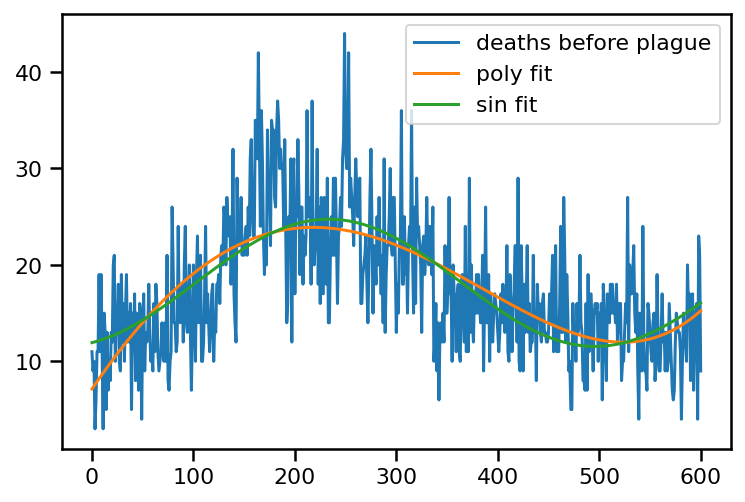

In [13]:
plt.plot(data_for_fit.loc[:plague_start].values,label='deaths before plague')
plt.plot(fitted_poly,label='poly fit')
plt.plot(fitted_sin,label='sin fit')

plt.legend();

compute the baseline, considering mortality rate

In [14]:
copy_data_for_fit = pd.DataFrame(data_for_fit, columns=['original'])

# averate mortality rate, from fitted sin
copy_data_for_fit['earlier_sin_mortality'] = early_deaths_sin(range(copy_data_for_fit.shape[0]), *sin_params) / N

# baseline of deaths, by applying rates(t) to left alive(t)
copy_data_for_fit['baseline'] = np.round((N - copy_data_for_fit.original.cumsum()) * \
                                         copy_data_for_fit.earlier_sin_mortality)

copy_data_for_fit['shifted'] = copy_data_for_fit.original - copy_data_for_fit.baseline

# remove mortality rates, as we don't need them anymore
copy_data_for_fit.drop('earlier_sin_mortality', axis=1, inplace=True)

show difference between orignal and shifted TS

In [15]:
## plot whole dataset
plt.figure(figsize=(18, 5))
copy_data_for_fit.original.plot()
copy_data_for_fit.baseline.loc[:plague_start].plot()
copy_data_for_fit.shifted.loc[plague_start:end_tail].plot()

# plt.xticks(rotation=0)
plt.ylim([-30, 100])
plt.axvline(x=plague_start, label=plague_start.date(), c='k')
plt.axvline(x=end_tail, label=end_tail.date(), c='r')
# plt.axhline(y=0,c='k')

plt.xticks(rotation=0, ha='center')
plt.legend()
plt.tight_layout()

plt.savefig('./fitting_plots/baseline.pdf')
plt.close();

In [16]:
## now we get negative deaths -- not surprisingly
print('N. days with negative counts until end of the tail:',
      sum(copy_data_for_fit.loc[plague_start:end_tail, 'shifted'] < 0))

print('Total negative deaths until end of the tail:',
      copy_data_for_fit.shifted[(copy_data_for_fit.shifted < 0)
                                & (copy_data_for_fit.index < end_tail) &
                                (copy_data_for_fit.index > plague_start)].sum())

N. days with negative counts until end of the tail: 17
Total negative deaths until end of the tail: -49.0


__set negative values to 0__ – and assign finalized preprocessed data to variable for fit

In [17]:
copy_data_for_fit.shifted[copy_data_for_fit.shifted < 0] = 0

data_for_fit = copy_data_for_fit.shifted

check results

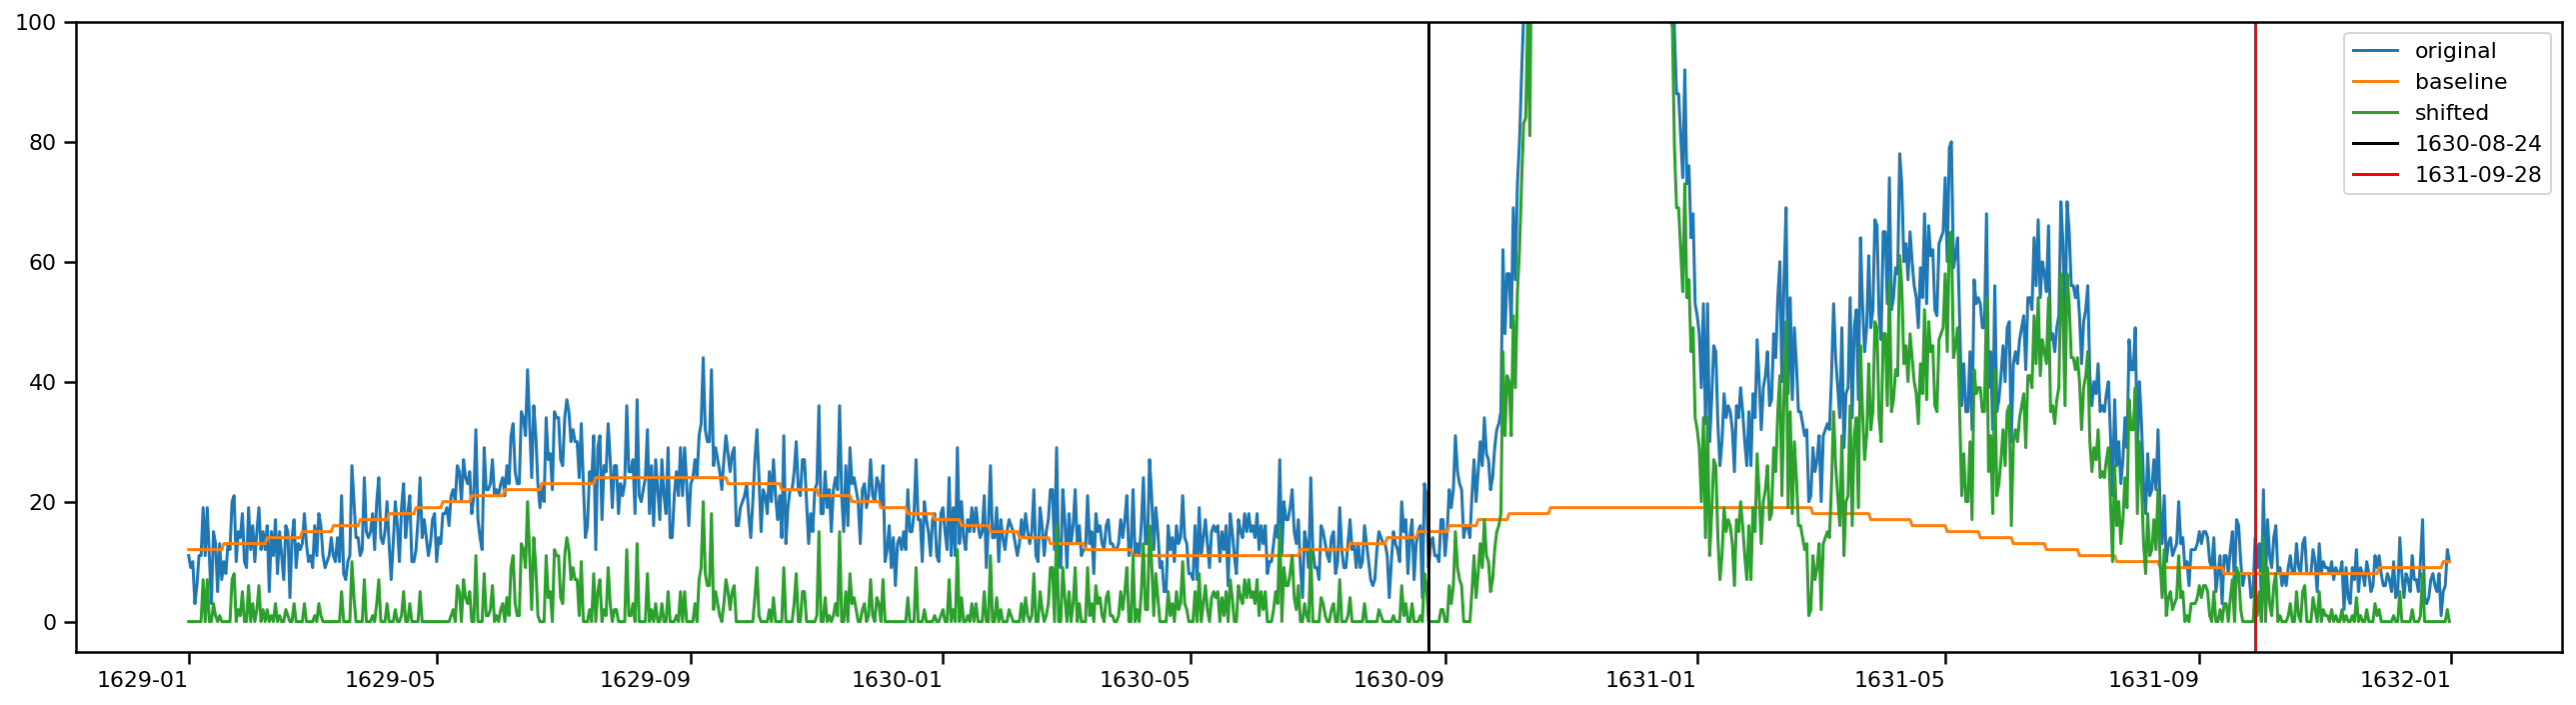

In [48]:
copy_data_for_fit.plot(figsize=(18, 5))
plt.ylim([-5, 100])

plt.axvline(x=plague_start, label=plague_start.date(), c='k')
plt.axvline(x=end_tail, label=end_tail.date(), c='r')
plt.legend()
plt.xticks(rotation=0)
plt.tight_layout()

In [19]:
# export data to fit
data_for_fit.to_csv('dataset/city_cases_baseline_removed.csv')

In [20]:
# clean var
del sin_params, sin_params_covariance, sin_pars_bounds, sin_pars_names, fitted_poly, fitted_sin, copy_data_for_fit
gc.collect();

##  function to prepare data for fit 

**required** for following sections: function to apply time-window restriction (this function is needed for the fits)

mind that [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) 
cannot set constraints on the derivative, but only on y(t) ...    
so, __cumulative deaths have to be passed as init. cond.__, _no matter_ if one wanna fit R(t) and or dR(t)/dt

$R(t_{0})$ still remains important as it will change $S(t_{0})$ 

In [129]:
def subset_time_win_fun(window_size, time_rescaling=False):
    '''
    function to subset data for fit
    
    1 -> avialable time windows sizes:

        'all_days', '400_days',
        '200_days' , '150_days',
        'short_tail', 'long_tail'

        returns, in this order:
        x array of dates for plot    
        Vh0 -- init. cond. for deaths (V(t))
        x array of integers (time points) for fit
        y array of deaths to fit

    2 -> you can also rescale the time (my_x only) [time_rescaling=True]
        for instance for model parameters given as rates/year... 
    
    returns:
    * x_for_plot: x for plotting
    * my_Vh0: init. N victims
    * my_x, my_y: x and y for fitting
    '''

    if window_size == 'all_days':
        temp_data = data_for_fit
        my_Vh0 = data_for_fit[0]
    elif window_size == '400_days':
        temp_data = data_for_fit[600:1000]
        my_Vh0 = sum(data_for_fit[600:600])
    elif window_size == '200_days':
        temp_data = data_for_fit[600:800]
        my_Vh0 = sum(data_for_fit[600:600])
    elif window_size == '150_days':
        temp_data = data_for_fit[600:750]
        my_Vh0 = sum(data_for_fit[600:600])
    elif window_size == 'long_tail':
        temp_data = data_for_fit[750:]
        my_Vh0 = sum(data_for_fit[600:750])
    elif window_size == 'short_tail':
        temp_data = data_for_fit[790:]
        my_Vh0 = sum(data_for_fit[600:790])
    else:
        print('wrong input!')

    # build time-steps for integration
    if time_rescaling:
        my_x = np.linspace(start=1, stop=(len(temp_data)),
                           num=len(temp_data)) / 365
    else:
        my_x = np.linspace(start=1, stop=(len(temp_data)), num=len(temp_data))

    # get ydata to fit in right shape
    my_y = temp_data.values

    # get dates for plot
    x_for_plot = temp_data.index

    return x_for_plot, my_Vh0, my_x, my_y

reload data -- with _baseline removed_

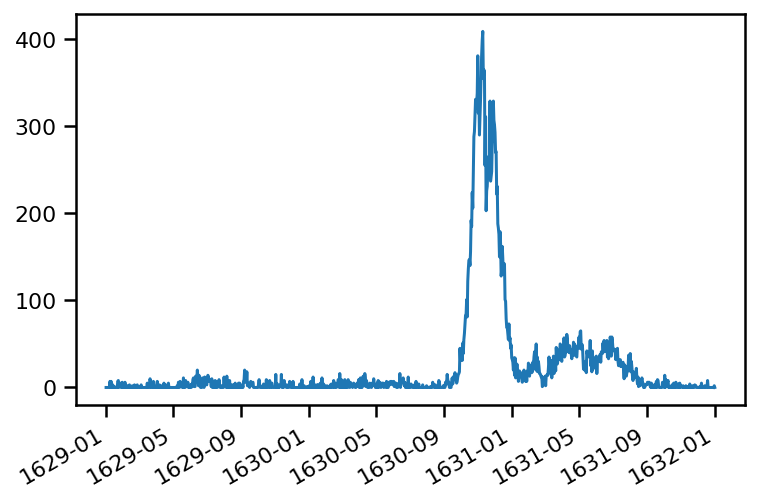

In [7]:
data_for_fit = pd.read_csv('dataset/city_cases_baseline_removed.csv',
                           index_col=0,
                           infer_datetime_format=True)

# we always have to fix index, unfortunately...
data_for_fit.index = good_index_fun(data_for_fit.shape[0])

# transform to a series
data_for_fit = pd.Series(data_for_fit.shifted)

# re-check loaded data
data_for_fit.plot();

# Simple SIR

## model definition 

mind that for uniformity with the other model we use `V` (human Victims), instead of `R` (recovered, from the SIR, also because humans indeed usually did not recover...)

In [8]:
def simple_SIR_fun(integr_time,
                   my_Ih0,
                   beta,
                   gamma,
                   testing=False): 
    '''
    runs ODEs solver 
    
    return ALL variables - if TESTING (testing=True) or
    variable to fit, if FITTING (testing=False)
    '''

    ### sub-function that compute derivatives ###
    def sir_sys(y, t):

        ## human variables ##
        Sh = y[0]  #  Number of susceptible humans
        Ih = y[1]  #  Number of infected humans
        Vh = y[2]  #  Number of humans victims

        ### ODEs ###
        f0 = -beta * Sh * Ih / N
        f1 = beta * Sh * Ih / N - gamma * Ih
        f2 = gamma * Ih

        return [f0, f1, f2]

    ###  init. cond. for integration ###
    # remember that here Ih0 is fitted and Vh0 is given as data input
    Sh0 = N - my_Ih0 - Vh0
    ds = odeint(func=sir_sys, y0=[Sh0, my_Ih0, Vh0], t=integr_time)

    if testing:

        ##return ALL variables - if you are TESTING
        return [ds[:, 0], ds[:, 1], ds[:, 2]]

    ## return ONE variables - if you are FITTING
    elif type_of_fit == 'fits_daily_deaths':

        ## mind that if you choose to fit dR/dt you still have to pass R(0) (and not dR/dt)
        return gamma * ds[:, 1]

    elif type_of_fit == 'fits_cumsum_data':

        return ds[:, 2]

    else:
        print('wrong input!')

##  testing SIR before fit

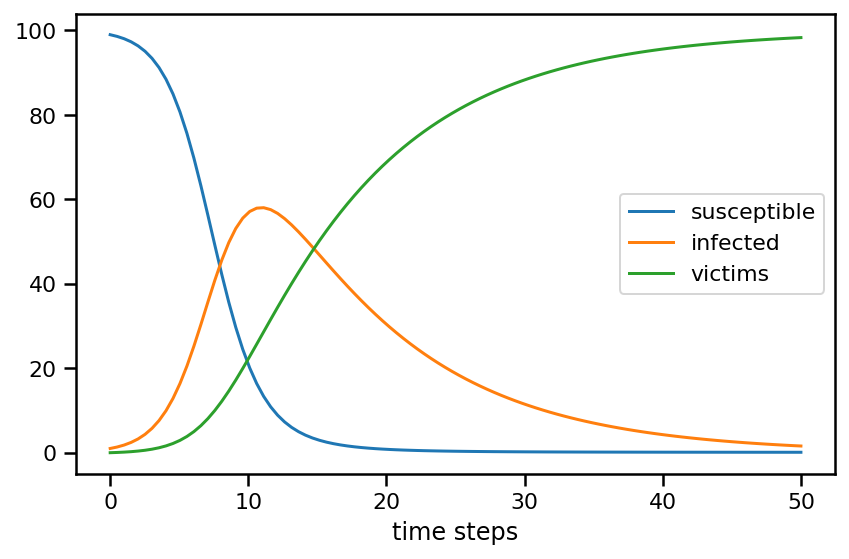

In [10]:
# set special. init. cond.
N = 100
Ih0 = 1
Vh0 = 0
# Sh0 = N - Ih0 - Vh0

# define time - independent variable
time_for_sir = np.linspace(start=0, stop=0.5 * 10**2, num=10**2)

# solve the ODEs
outputs_simple_sir = simple_SIR_fun(time_for_sir,
                                    Ih0,
                                    beta=0.7,
                                    gamma=0.1,
                                    testing=True)

# plot the results
plt.plot(time_for_sir, outputs_simple_sir[0], label='susceptible')
plt.plot(time_for_sir, outputs_simple_sir[1], label='infected')
plt.plot(time_for_sir, outputs_simple_sir[2], label='victims')

plt.legend()
# plt.yscale('log')
plt.xlabel('time steps')
plt.tight_layout()

## run SIR fit 

set init. cond. for fit 

In [11]:
N = 1.4 * 1e+5  # initial population size 
fraction_Ih0 = 1e-4 # initial fraction of infected
Ih0 = N * fraction_Ih0

# initial susceptible
Sh0 = N - Ih0 - Vh0

print('human init. values:',[Sh0,Ih0,Vh0])

human init. values: [139986.0, 14.0, 0]


choose the __time-window__ of the data we want to fit

init. victims for the model Vh0: 0


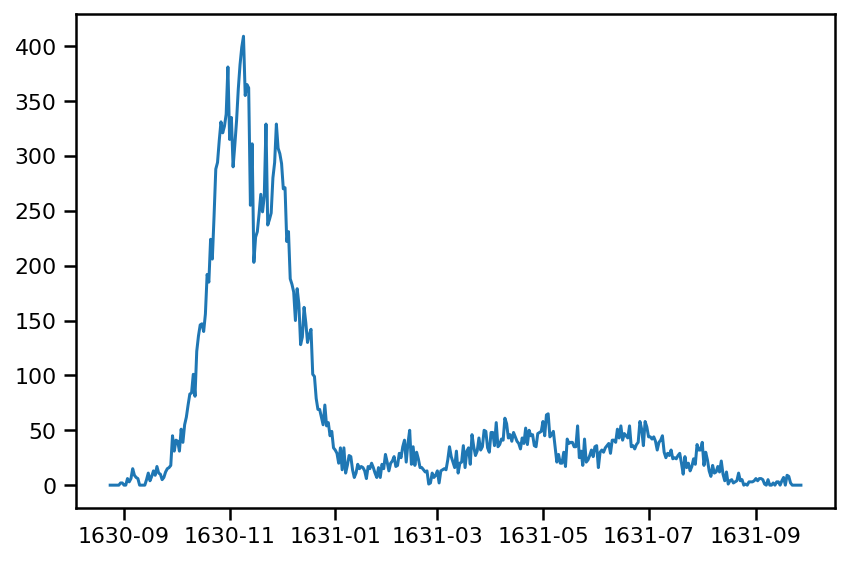

In [25]:
time_w_size = '400_days'  # keep this variable as it will be used to save the plots!
x_to_plot, Vh0, my_xdata, my_ydata = subset_time_win_fun(time_w_size)

# just a double check of the chosen data
print('init. victims for the model Vh0:', Vh0)
plt.plot(x_to_plot, my_ydata)
plt.tight_layout()

Here is a list of examples, to get started with the fitting of ODE:

- http://adventuresinpython.blogspot.ch/2012/08/fitting-differential-equation-system-to.html
- http://kitchingroup.cheme.cmu.edu/blog/2013/02/18/Fitting-a-numerical-ODE-solution-to-data/
- https://stackoverflow.com/questions/11278836/fitting-data-to-system-of-odes-using-python-via-scipy-numpy

choose if you want to fit data to daily ($R'(t)$) or cumulative ($R(t)$)

In [26]:
type_of_fit = 'fits_daily_deaths'  #  or 'fits_cumsum_data' 'fits_daily_deaths' ; 'all_vars'
## this is also the name of the folder to save plots

set parameters bounds for fitted parameters

In [34]:
# for beta and gamma
lower = 0.01
upper = 2
# for Ih0 
lower_Ih0 = 1  # we need at least 1 of course to generate the epidemic
upper_Ih0 = 100  

# bounds for global optim
bounds_simple_SIR = [(lower_Ih0, upper_Ih0), (lower, upper), (lower, upper)]

### global optimization

define cost function 

In [32]:
def cost_fun(my_pars):
    '''
    returns the MSE between fit and data
    '''

    return mean_squared_error(my_ydata, simple_SIR_fun(my_xdata, *my_pars))

run optimization in parallel

In [31]:
import multiprocessing
# line needed from python 3.8 – see https://stackoverflow.com/questions/60518386/error-with-module-multiprocessing-under-python3-8
multiprocessing.set_start_method("fork")

In [102]:
%time evol_results = differential_evolution(cost_fun,bounds=bounds_simple_SIR,workers=8)

print(evol_results)

# storing paramters from global fit to be refined with local fit
p0_from_evol_fit = evol_results.x

# assess best fit

evol_algo_fit = simple_SIR_fun(my_xdata, *evol_results.x)

sir_r2 = r2_score(y_true=my_ydata, y_pred=evol_algo_fit)
print('R2 on R\'(t):', sir_r2)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/optimize/_differentialevolution.py:495: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  warnings.warn("differential_evolution: the 'workers' keyword has"


CPU times: user 601 ms, sys: 70.5 ms, total: 671 ms
Wall time: 1.27 s
     fun: 1044.8826272904887
 message: 'Optimization terminated successfully.'
    nfev: 1770
     nit: 33
 success: True
       x: array([5.39329445, 0.96933023, 0.89859766])
R2 on R'(t): 0.8762623685943567


In [103]:
bounds_simple_SIR

[(1, 100), (0.01, 2), (0.01, 2)]

In [104]:
[np.round(p,3) for p in evol_results.x]

[5.393, 0.969, 0.899]

In [105]:
# compute how 'centered' is each fitted pars, w.r.t imposed bounds
[np.round( (evol_results.x[i] - bounds_simple_SIR[i][0]) / (bounds_simple_SIR[i][1] - bounds_simple_SIR[i][0]) ,3) for i in range(len(bounds_simple_SIR))]

[0.044, 0.482, 0.447]

### local optimization

here we refine the solution found via global optimization

In [108]:
# set tolerance for the norm of the gradient vector:  2.220446049250313e-16 is the min allowed
my_gtol = 3 * 10**(-16)

fit_pars_sir, pars_cov_sir = curve_fit(f=simple_SIR_fun,
                                       xdata=my_xdata,
                                       ydata=my_ydata,
                                       p0=p0_from_evol_fit,
                                       gtol=my_gtol)

## bounds can also be set in case ##
#bounds=([lower_Ih0,lower,lower],[upper_Ih0,upper,upper]),
# bounds=[[0]*3,[np.inf]*3],

run simulations with fitted parameters

In [109]:
sir_best_fit = simple_SIR_fun(my_xdata, fit_pars_sir[0], fit_pars_sir[1],
                              fit_pars_sir[2])

compute goodness of the fit ($ R^{2}$) 

In [110]:
sir_r2 = r2_score(y_true=my_ydata, y_pred=sir_best_fit)
print('R2 on R\'(t):', sir_r2)

R2 on R'(t): 0.8763133800669061


basically no improvement - ... after all, the `differential_evolution` is already doing 'polishing'

## plot fitted parameters

show and plot values and errors

fitted pars sir: [5.30736873 0.97695923 0.90612922]
pars errors: [0.07417698594473911, 0.012346141169644602, 0.011921677901305354]
R0: 1.0781676722569724
R0 error: 0.027810281640479023


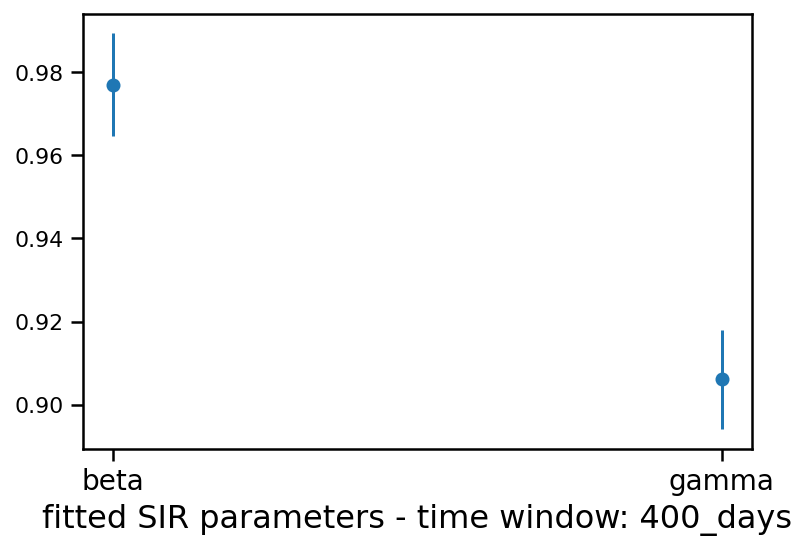

In [106]:
[error_Ih0, error_beta, error_gamma] = np.sqrt(np.diag(pars_cov_sir))
print('fitted pars sir:', fit_pars_sir)
print('pars errors:', [error_Ih0, error_beta, error_gamma])

Ih0 = fit_pars_sir[0]
beta = fit_pars_sir[1]
gamma = fit_pars_sir[2]

R0 = beta / gamma
print('R0:', R0)
R0_error = R0 * (error_beta / beta + error_gamma / gamma)
print('R0 error:', R0_error)

### ### ### plot ### ### ###
# prepare data for plot
p_to_plot = np.linspace(1, len(fit_pars_sir), len(fit_pars_sir))

plt.errorbar(x=p_to_plot[1:],
             y=fit_pars_sir[1:],
             fmt='o',
             yerr=[error_beta, error_gamma])

# pars_names_sir = ['Ih0','beta', 'gamma']
pars_names_sir = ['Ih0', 'beta', 'gamma']

plt.xticks(p_to_plot[1:], pars_names_sir[1:], size=14)
plt.xlabel('fitted SIR parameters - time window: ' + time_w_size, size=16);

save fitted parameters into a file

In [116]:
### save cov matrix

 ### ### ## save fittted pars in single model folder ### ### ###
# file_path = 'fitting_plots/sir_daily_deaths/'

 ### ### save fittted pars in comparative plots folder  ### ###
file_path = 'fitting_plots/comparative_plots/'

file_name = file_path + time_w_size + '_' + 'pars_cov_sir_' + '.csv'
pd.DataFrame(pars_cov_sir,columns=pars_names_sir,index=pars_names_sir).to_csv(file_name)

file_name = file_path + time_w_size + '_' + 'fit_pars_sir_' + '.csv'
pd.DataFrame(fit_pars_sir,index=pars_names_sir,columns=['fitted_values']).to_csv(file_name)

## plot data VS best fit

In [112]:
plt.figure(figsize=(8, 4))

plt.plot(x_to_plot, sir_best_fit, label='SIR best fit')
plt.plot(x_to_plot, my_ydata, label='data')

plt.ylabel('daily human deaths', size=16)
plt.xlabel('')
plt.xticks(fontsize=10)  # rotation=20

anno_x = x_to_plot[int(len(x_to_plot) * 0.8)]
anno_y = int((max(my_ydata) + min(my_ydata)) * 0.5)



plt.annotate('R2=' + str(np.round(sir_r2, 4)), xy=(anno_x, anno_y), fontsize=16)

plt.legend()
plt.tight_layout()

## saving the plot
sir_plot_string = 'sir_' + time_w_size + '_' + type_of_fit + '.pdf'
plt.savefig('./fitting_plots/sir_daily_deaths/' + sir_plot_string )
plt.close()

# Rats-Fleas-Humans model

the following model has been taken from:   

[Modelling the black death. A historical case study and implications for the epidemiology of bubonic plague](http://www.sciencedirect.com/science/article/pii/S1438422109000526?via%3Dihub_)  
_Stefan Monecke, Hannelore Moneckeb, Jochen Monecke_ 

## model definition

In [9]:
N = 1.4 * 1e+5  # initial population size 

assign initial conditions

In [10]:
## ## ## rats variables ## ## ##
immune_ratio = 0
N0_rats = 6 * 10**4  # initial number of rats population - taken from keeling & galligan, 2000
Sr0 = 0.999 * (1 - immune_ratio) * N0_rats  # initial Number of susceptible rats  - same number as
Ir0 = 0.001 * (1 - immune_ratio) * N0_rats  # initial Number of infected rats
Gr0 = immune_ratio * N0_rats  # initial Number of immune rats
Dr0 = 0  # ?? - initial Number of dead rats

## ## ## fleas variables ## ## ##
N0 = 10  # 10 is correct ??? #  Number of fleas on one rat
F0 = 1  # Number of infectious, free fleas --  set = 1 in M & M & M,2009

## ## ## human variables --> see next sub-section ## ##
# we have here another variable, w.r.t 'SIR': initial recovered humans
Rh0 = 0

assign initial parameters values (for the fit) - 
collected from [the same paper](https://ac.els-cdn.com/S1438422109000526/1-s2.0-S1438422109000526-main.pdf?_tid=a40fb7c4-b356-11e7-9752-00000aacb35f&acdnat=1508257216_e113a1076b9a98fd001a11a3d613b117)

In [11]:
# (rates from the paper are given PER YEAR)

r0 = 5   # Reproductive rate of rats (from Keeling and Gilligan, 2000)
Kr0 = N  #  Rats carrying capacity -- Assumed to be identical to the number of inhabitants (1908 plague commission)
br0 = 52.3   # Transmission rate to rats - TO BE FITTED
Z0 = 29.97 # Parameter of flea searching activity - TO BE FITTED
rr0 = 20.2    #  Death rate of infected rats (from Keeling and Gilligan, 2000)
rf0 = 20   # Reproductive rate of fleas (from Keeling and Gilligan, 2000)
Kf0 = 6.57 # Fleas carrying capacity (from Keeling and Gilligan, 2000)
df0 = 17.63    # Death rate of infectious, free fleas - TO BE FITTED
bh0 = 1.474 * 10**(-4)    # Transmission rate to men - TO BE FITTED
rh0 = 26.04   # Reduction rate of infected humans due to death or recovery (from Keeling and Gilligan, 2000)
ph0 = 0.15  # Probability of recovery of humans (1908 plague commission)

init_pars = [r0,Kr0,br0,Z0,rr0,rf0,Kf0,df0,bh0,rh0,ph0]

set whether you want to fit using all parameters (or only the 4 ones used in the MMM paper)

In [12]:
### remember to CHANGE ALSO the definition of the integration fun. according to the # of pars to fit
num_pars = 'all_pars' # '4_pars' 

def the function for the ODE system integration

(remember to (un)comment the function definition, according to the N pars)

In [76]:
# def integration_fun(integr_time, my_Ir0, my_Ih0, r, Kr, br, Z, rr, rf, Kf, df, bh, rh, ph):
def integration_fun(integr_time, my_Ih0, r, Kr, br, Z, rr, rf, Kf, df, bh, rh, ph):  # fit all pars

    # def integration_fun(integr_time,my_Ir0,my_Ih0,my_N0,br,Z,df,bh): # fit only parameters fitted in the paper + vars
    # def integration_fun(integr_time,my_Ir0,my_Ih0,br,Z,df,bh): # fit only parameters fitted in the paper + vars
    '''
    run ODEs solver for Rat-Flea-Human model - from MMM paper
    (remind to change definition of the function according to the N of paramters you want to fit):
    
    (these are used as global variables, as we need them later to save plots)
    * num_pars: num. parameters of the RFH model to fit ('4_pars' VS 'all_pars')
    * type_of_fit: usually we keep to daily deaths
    '''

    if num_pars == '4_pars':
        #  if you wanna fit only the 4 pars of the paper,
        # we set the others = to the values from the MMM paper

        r = r0
        Kr = Kr0
        rr = rr0
        Kf = Kf0
        rf = rf0
        ph = ph0
        rh = rh0

    ### function that compute derivatives ###
    def rfh_sys(y, t):  ## if integrate with: >>>'odeint'<<<

        ### ### ### 9 (+7) variables definition ### ### ###
        # the order follows from equations - see ref. given above

        ## rats variables ##
        Sr = y[0]  # Number of susceptible rats
        Ir = y[1]  # Number of infected rats
        Dr = y[2]  #  Number of dead rats

        ## fleas variables ##
        N = y[3]  #  Number of fleas on one rat
        F = y[4]  #  Number of infectious, free fleas

        ## human variables ##
        Sh = y[5]  #  Number of susceptible humans
        Ih = y[6]  #  Number of infected humans
        Vh = y[7]  #  Number of humans victims
        Rh = y[8]  #  Number of recovered humans

        ### ###   auxiliary variable ### ###
        Pr = Sr + Ir + Gr0  # susceptibile + infected (+ immune) rats
        #         R0 # Basic reproductive ratio
        #         A  # Area
        #         Amax  # Maximum area, a flea can rummage per time unit
        #         W  #  Infection probability of rats
        #         S #  Measure of sensitivity

        ### ### ###  model equations ### ### ###
        # following the order in which they appear in the paper
        ### rats ODEs ###
        f0 = r * Sr * (1 - Pr / Kr) - br * Sr * F / (Pr + Z)
        f1 = br * Sr * F / (Pr + Z) - rr * Ir
        f2 = rr * Ir
        ###  ###
        f3 = rf * N * (1 - N / Kf) + br * F / (Pr + Z)
        f4 = rr * Ir * N - df * F

        ### humans ODEs ###
        f5 = -bh * Sh * F * (1 - Pr / (Pr + Z))
        f6 = bh * Sh * F * (1 - Pr / (Pr + Z)) - rh * Ih
        f7 = (1 - ph) * rh * Ih
        f8 = ph * rh * Ih

        return [f0, f1, f2, f3, f4, f5, f6, f7, f8]

    Sh0 = N - my_Ih0 - Vh0 - Rh0  # compute initial susceptible humans
    ### ### ### ### different fitting options ### ### ### ### ###
    ## case for fitting also few pop variables
    #     Sr0 = N0_rats - my_Ir0 - Dr0  # compute initial susceptible rats ## v. if you want to fit also init. inf. rats
    #     init_cond = [Sr0, my_Ir0, Dr0, N0, F0, Sh0, my_Ih0, Vh0, Rh0]
    ### ### ### ### ### ### ### ### ###
    init_cond = [Sr0, Ir0, Dr0, N0, F0, Sh0, my_Ih0, Vh0, Rh0]
    ### ### ### ### ### ### ### ### ###
    #init_cond = [Sr0,Ir0,Dr0,N0,F0,Sh0,Ih0,Vh0,Rh0] # all ini. values are passed as global vars
    ### ### ### ### ### ### ### ### ###

    ### ### ###  integration ### ### ###
    #  the mxstep par was changed because of the warning message we got without it,
    # according to this SO post: https://stackoverflow.com/questions/16973036/odd-scipy-ode-integration-error

    #     ds = odeint(func=rfh_sys,y0=init_cond,t=integr_time,printmessg=True)
    #     return ode_sol[:,7]

    ode_sol = odeint(rfh_sys, init_cond, integr_time)

    if type_of_fit == 'fits_daily_deaths':

        ### either fit dVh(t)/dt VS daily deaths ...
        return (1 - ph) * rh * ode_sol[:, 6]

    elif type_of_fit == 'fits_cumsum_data':

        ### ... or we fit Vh(t) VS cumulated data ...
        return ode_sol[:, 7]

    elif type_of_fit == 'all_vars':

        return [ode_sol[:,0],ode_sol[:,1],ode_sol[:,2],ode_sol[:,3],ode_sol[:,4],\
                ode_sol[:,5],ode_sol[:,6],ode_sol[:,7],ode_sol[:,8]]
    else:
        print('wrong input!')

## model fitting

### data to fit and pars init. cond. 

choose the __time-window__ of the data we want to fit

init. victims for the model Vh0: 0


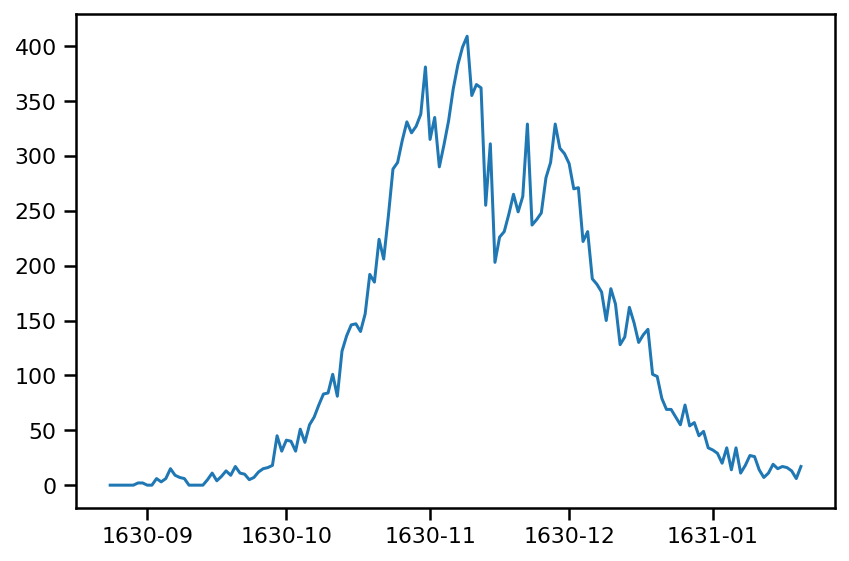

In [18]:
time_w_size = '150_days' # keep this variable as it will be used to save the plots!
x_to_plot, Vh0, my_xdata, my_ydata = subset_time_win_fun(time_w_size,time_rescaling=True) 

# just a double check of the chosen data
print('init. victims for the model Vh0:',Vh0)
plt.plot(x_to_plot,my_ydata)
plt.tight_layout();

(re)set initial values for addition variables of RFH

In [67]:
# we have here another variable, w.r.t 'SIR': initial recovered humans
Rh0 = 0

# ...therefore we have to reset the initial susceptibles:
# Sh0 = N - Ih0 - Vh0 - Rh0

print('rats init. values:', [Sr0, Ir0, Dr0])
print('fleas init. values:', [N0, F0])
print('humans init. values:', ['constrained Sh0', 'fitted Ih0', Vh0, Rh0])

rats init. values: [59940.0, 60.0, 0]
fleas init. values: [10, 1]
humans init. values: ['constrained Sh0', 'fitted Ih0', 0, 0]


set boundaries for init. values of epi variables and model pars

In [17]:
# seems we have to increase N0_rats:
N0_rats = 1e5 ## before N0_rats = 60000

In [18]:
##  Ir0 bounds for fit
lower_Ir0 = 1e3 # we need at least 1 of course to generate the epidemic
upper_Ir0 = N0_rats - Dr0 # theoretical max


##  Ih0 bounds for fit
lower_Ih0 = 0 # we need at least 1 of course to generate the epidemic
upper_Ih0 = 100 #N - Vh0 - Rh0 # theoretical max

##  N0 bounds for fit
lower_N0 = 0.1 
upper_N0 = 10

In [19]:
### rats pars ###
# Reproductive rate of rats
lower_r0 = 1e-3
upper_r0 = 1e-1
# Rats carrying capacity
lower_Kr0 = 1e-1
upper_Kr0 = 10
# Transmission rate to rats
lower_br0 = 0
upper_br0 = 10
# Death rate of infected rats
lower_rr0 = 1
upper_rr0 = 100

In [20]:
### fleas pars ###
# Reproductive rate of fleas
lower_rf0 = 1e-5
upper_rf0 = 1e-1
# flea searching activity -- mind that this is not in the same order as in the funct. def.
lower_Z0 = 1e-3
upper_Z0 = 1
# Fleas carrying capacity
lower_Kf0 = 1
upper_Kf0 = 100
# Death rate of infectious, free fleas
lower_df0 = 1e-2
upper_df0 = 10

In [21]:
### human pars ###
# Reduction rate of infected humans
lower_bh0 = 1e-1
upper_bh0 = 10
# Reduction rate of infected humans
lower_rh0 = 1
upper_rh0 = 100
# Probability of recovery of humans
lower_ph0 = 1e-1
upper_ph0 = 10

In [22]:
### putting all bounds together

bounds_RFH = [(lower_Ir0,upper_Ir0),(lower_Ih0,upper_Ih0),
              (lower_rr0,upper_rr0),(lower_Kr0,upper_Kr0),(lower_br0,upper_br0),(lower_Z0,upper_Z0),(lower_rr0,upper_rr0),
              (lower_rf0,upper_rf0),(lower_Kf0,upper_Kf0),(lower_df0,upper_df0),
              (lower_bh0,upper_bh0),(lower_rh0,upper_rh0),(lower_ph0,upper_ph0)]

# bounds_RFH = [(lower_Ir0,upper_Ir0),(lower_Ih0,upper_Ih0),
#               (lower_br0,upper_br0),(lower_Z0,upper_Z0),
#               (lower_df0,upper_df0),
#               (lower_bh0,upper_bh0)]

### global optim

reload data -- with _baseline removed_

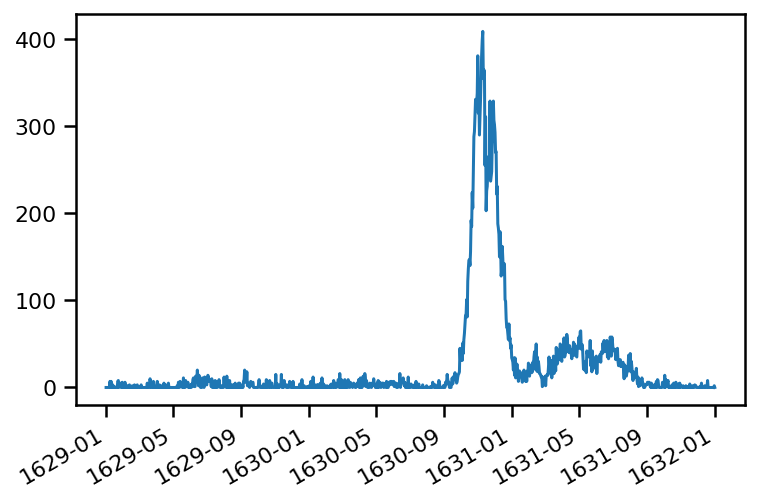

In [31]:
data_for_fit = pd.read_csv('dataset/city_cases_baseline_removed.csv',
                           index_col=0,
                           infer_datetime_format=True)

# we always have to fix index, unfortunately...
data_for_fit.index = good_index_fun(data_for_fit.shape[0])

# transform to a series
data_for_fit = pd.Series(data_for_fit.shifted)

# re-check loaded data
data_for_fit.plot();

In [ ]:
N = 1.4 * 1e+5  # initial population size 

choose if you want to fit data to daily ($R'(t)$) or cumulative ($R(t)$)

In [27]:
type_of_fit = 'fits_daily_deaths'  #  or 'fits_cumsum_data' 'fits_daily_deaths' ; 'all_vars'
## this is also the name of the folder to save plots

In [23]:
def cost_fun(my_pars):
    
    '''
    returns the MSE between fit and data
    '''
    try:
        fitted_values = integration_fun(my_xdata,*my_pars)
        return mean_squared_error(my_ydata,fitted_values)        
    
    except ValueError:
        
        return 1e4

In [6]:
# here we suppress temporarly all the warning coming from the failed integration 
# -- the ODEs integration fails quite often as we are probably exploring regions where the problem is not defined....
import warnings
warnings.filterwarnings('ignore')

In [29]:
# clear previous results
if 'evol_algo_fit' in locals():
    del evol_algo_fit

%time evol_results = differential_evolution(cost_fun,bounds=bounds_RFH,workers=8,polish=True,tol=1)

print(evol_results)

# storing paramters from global fit to be refined with local fit
p0_from_evol_fit = evol_results.x

# assess best fit

evol_algo_fit = integration_fun(my_xdata, *evol_results.x)

rfh_r2 = r2_score(y_true=my_ydata, y_pred=evol_algo_fit)
print('R2 on R\'(t):', rfh_r2)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/optimize/_differentialevolution.py:495: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  warnings.warn("differential_evolution: the 'workers' keyword has"


CPU times: user 6.39 s, sys: 133 ms, total: 6.52 s
Wall time: 50.5 s
     fun: 3421.9705885333265
     jac: array([1359.84770742, 1361.62100364,  256.30481712, 1359.21648175,
       1177.2780389 , 1319.03129178,  810.64818498, 1219.7112028 ,
       1361.65820197, 1703.46562425, 1460.47436906, 1365.66535974,
       2725.6636576 ])
 message: 'Optimization terminated successfully.'
    nfev: 6633
     nit: 30
 success: True
       x: array([8.18355647e+04, 5.85350018e+01, 3.40637958e+01, 9.80136790e+00,
       8.56699259e+00, 7.45810781e-01, 7.34890270e+00, 1.07969230e-02,
       3.27649580e+01, 4.39420953e+00, 4.15006876e-01, 6.49254202e+01,
       9.99579024e-01])
R2 on R'(t): 0.7814003748850415


In [30]:
bounds_RFH

[(1000.0, 100000.0),
 (0, 100),
 (1, 100),
 (0.1, 10),
 (0, 10),
 (0.001, 1),
 (1, 100),
 (1e-05, 0.1),
 (1, 100),
 (0.01, 10),
 (0.1, 10),
 (1, 100),
 (0.1, 10)]

In [31]:
[np.round(p,4) for p in evol_results.x]

[81835.5647,
 58.535,
 34.0638,
 9.8014,
 8.567,
 0.7458,
 7.3489,
 0.0108,
 32.765,
 4.3942,
 0.415,
 64.9254,
 0.9996]

In [32]:
# compute how 'centered' is each fitted pars, w.r.t imposed bounds
[
    np.round((evol_results.x[i] - bounds_RFH[i][0]) /
             (bounds_RFH[i][1] - bounds_RFH[i][0]), 3)
    for i in range(len(bounds_RFH))
]

[0.817,
 0.585,
 0.334,
 0.98,
 0.857,
 0.746,
 0.064,
 0.108,
 0.321,
 0.439,
 0.032,
 0.646,
 0.091]

### local optim

set whether to provide initial values for the parameters (fitted values from the MMM paper) - or not

In [38]:
# choose whether to use initial parameters  values for the fit
pars_init_boolean = 'no_p0' # 'with_p0' ; 'no_p0' <<<< with_p0 is always worst!

mind that `curve_fit` has some _hyper-paramters_ that can be modified to _improve the fit_, like: `maxfev` or `gtol` 

In [33]:
# set tolerance for the norm of the gradient vector:  2.220446049250313e-16 is the min allowed
my_gtol = 3 *10**(-15)  

actual fit

In [41]:
pars_init_boolean

'no_p0'

In [ ]:
print('N of par fitted:',num_pars)
print('Are parameters inizialized? :',pars_init_boolean)

if num_pars=='4_pars' and pars_init_boolean=='with_p0':
    
    %time fit_pars_rfh, pars_cov_rfh = curve_fit(f=integration_fun,xdata=my_xdata,ydata=my_ydata,\
                                         bounds=([0]*4,[np.inf]*4),gtol=my_gtol,\
                                         p0=[br0,Z0,df0,bh0])

elif num_pars=='4_pars' and pars_init_boolean=='no_p0':
    
    %time fit_pars_rfh, pars_cov_rfh = curve_fit(f=integration_fun,xdata=my_xdata,ydata=my_ydata,\
                                         gtol=my_gtol)
#     ,\
#                                          bounds=([lower_Ir0,lower_Ih0,lower_N0,*[1e-6]*4],\
#                                                  [upper_Ir0,upper_Ih0,upper_N0,*[np.inf]*4]))

elif num_pars=='all_pars' and pars_init_boolean=='with_p0':
    %time fit_pars_rfh, pars_cov_rfh = curve_fit(f=integration_fun,xdata=my_xdata,ydata=my_ydata,\
                                         bounds=([0]*11,[np.inf]*11),gtol=my_gtol,\
                                         p0=[r0,Kr0,br0,Z0,rr0,rf0,Kf0,df0,bh0,rh0,ph0])                                        


elif num_pars=='all_pars' and pars_init_boolean=='no_p0':
    %time fit_pars_rfh, pars_cov_rfh = curve_fit(f=integration_fun,xdata=my_xdata,ydata=my_ydata,\
                                         gtol=my_gtol,\
                                         bounds=([lower_Ih0,*[0]*11],[upper_Ih0,*[np.inf]*11]))

In [43]:
num_pars

'all_pars'

compute predictions and GOF (goodness of fit)

(As goodness of fit, for the time being we use simply $R^{2}$, but we can use in the future the ['adjusted' version](https://en.wikipedia.org/wiki/Coefficient_of_determination#cite_note-10))

In [103]:
best_fit_y = integration_fun(my_xdata, *fit_pars_rfh)

# jsut a trivial double check
print(best_fit_y[0], my_ydata[0])

## R2 on the DAILY deaths
rfh_r2 = r2_score(y_true=my_ydata, y_pred=best_fit_y)
print('R2 on R\'(t):', rfh_r2)

0.25178477466389626 0.0
R2 on R'(t): 0.8819454360884653


## plot and save fitted pars with cov

In [ ]:
p_to_plot = np.linspace(1, len(fit_pars_rfh), len(fit_pars_rfh))
my_yerrs = np.sqrt(np.diag(pars_cov_rfh))

## %% ## %% ## %% ## %% here starts the plot ## %% ## %% ## %% ## %%

plt.errorbar(x=p_to_plot,
             y=fit_pars_rfh,
             fmt='o',
             yerr=my_yerrs,
             label='fitted values')

if num_pars == 'all_pars':
    #     pars_names = ['r','Kr','br','Z','rr','rf','Kf','df','bh','rh','ph']
    pars_names = ['Ih0', 'r', 'Kr', 'br', 'Z', 'rr', 'rf', 'Kf', 'df', 'bh', 'rh', 'ph']
    plt.scatter(p_to_plot[1:],
                [r0, Kr0, br0, Z0, rr0, rf0, Kf0, df0, bh0, rh0, ph0],
                label='values from paper',
                c='k')
    plt.scatter(p_to_plot, [p for p in fit_pars_rfh],
                label='values from paper',
                c='k')
    plt.xticks(p_to_plot, pars_names)

elif num_pars == '4_pars':
    #     pars_names = ['br','Z','df','bh']
    pars_names = ['Ir0', 'Ih0', 'N0', 'br', 'Z', 'df',
                  'bh']  # <<< we tried addinf some init. values to fit
    plt.scatter(p_to_plot[3:], [br0, Z0, df0, bh0],
                label='values from paper',
                c='k')
    plt.xticks(p_to_plot, pars_names, size=14)

# mind that rates are in unit = 1/year !!
plt.ylabel('fitted value', size=16)
plt.xlabel('model parameters', size=16)

plt.yticks(size=14)

plt.ylim([-10, 100])
# plt.ylim([-5*10**6,5*10**6])
# plt.yscale('log')

plt.legend(loc='best')

# plt.tight_layout()
# plt.savefig('fitting_plots/fits_cumsum_data/fitted_VS_literature_pars.pdf');

print('values and errors for:', pars_names)
print([np.round(p, 4) for p in fit_pars_rfh])
print([np.round(err, 4) for err in my_yerrs])

save fitted parameters into a file

In [117]:
## save fittted pars in comparative plots folder ###
# name_base = 'fitting_plots/fits_cumsum_data/' +  \
# name_base = 'fitting_plots/comparative_plots/no_baseline_applied/' +  \
name_base = 'fitting_plots/comparative_plots/baseline_applied/' +  \
            time_w_size + '_' + num_pars + '_' + pars_init_boolean

## save fittted pars single model plots folder
# name_base = 'fitting_plots/fits_daily_deaths/baseline_removed/' +  \
#             time_w_size + '_' + num_pars + '_' + pars_init_boolean

# save cov matrix
file_name = name_base + '_pars_cov_RFH_' + '.csv'
pd.DataFrame(pars_cov_rfh, columns=pars_names,
             index=pars_names).to_csv(file_name)

# save fitted pars values
file_name = name_base + '_fit_pars_RFH_' + '.csv'
pd.DataFrame(fit_pars_rfh, index=pars_names,
             columns=['fitted_values']).to_csv(file_name)

## plot data VS predictions

plot __data VS best fit__ 

In [ ]:
# plt.figure(figsize=(10, 3))

# plt.plot(x_to_plot,best_fit_y, label='RFH best fit')
plt.plot(x_to_plot,evol_algo_fit, label='RFH global opt')
plt.plot(x_to_plot,my_ydata, label='data')


plt.ylabel('daily deaths', size=16)
#     plt.xlabel('days',size=16)
#     plt.xlabel('years',size=16)

anno_x = x_to_plot[int(len(x_to_plot) * 0.7)]
anno_y = int((max(my_ydata) + min(my_ydata)) * 0.5)

plt.annotate(
    'R2=' + str(np.round(rfh_r2, 4)), xy=(anno_x, anno_y), fontsize=16)

plt.legend(loc='best')
plt.tight_layout()

# ## save plot ### 
# build informative string  for plot name

# if_baseline = 'baseline_removed' # 'no_baseline_removed'
# string_for_plot = type_of_fit + '/' +  \
#                     if_baseline + '/'  + \
#                     time_w_size + '_' + num_pars + '_' + pars_init_boolean  + '.pdf'
# print(string_for_plot)

# plt.savefig('./fitting_plots/' + string_for_plot);
# plt.close()

# Comparative plots

## reload data

choose the __time-window__ of the data we want to fit

init. victims for the model Vh0: 19097.0


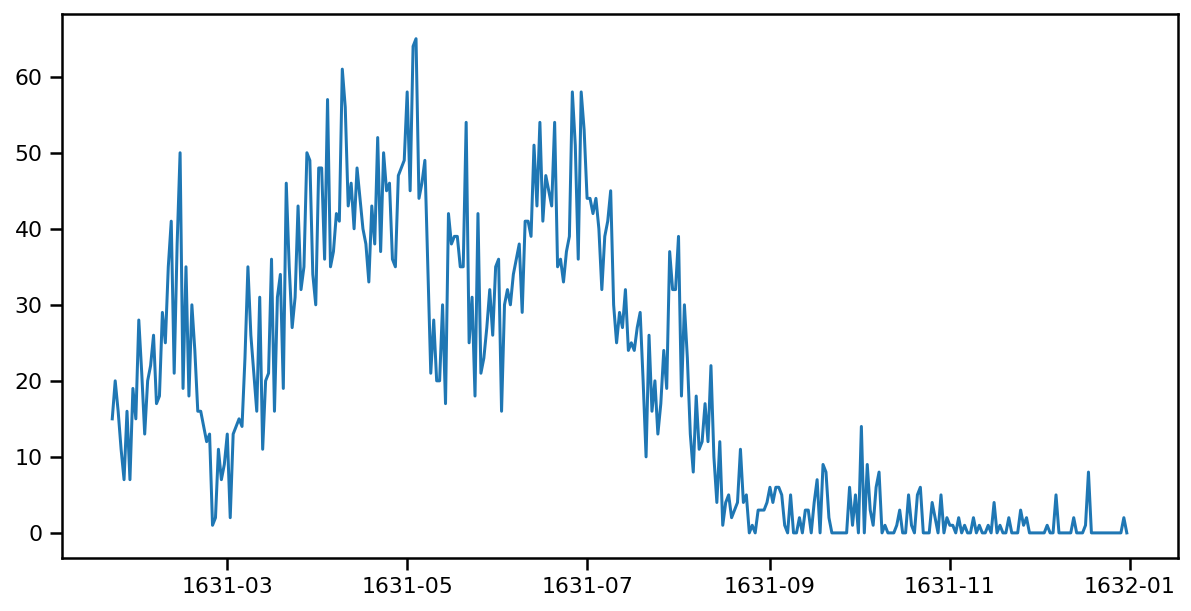

In [130]:
time_w_size = 'long_tail'  # 400_days , 150_days
x_to_plot, Vh0, my_xdata_sir, my_ydata = subset_time_win_fun(time_w_size)
x_to_plot, Vh0, my_xdata_rfh, my_ydata = subset_time_win_fun(time_w_size,
                                                             time_rescaling=True)  ## < mind need to rescaling for RFH! 

# just a double check of the chosen data
print('init. victims for the model Vh0:', Vh0)
plt.figure(figsize=(10,5))
plt.plot(x_to_plot, my_ydata);

## rerun models

load fitted parameters

In [131]:
sir_fitted_pars = pd.read_csv(
    f'fitting_plots/comparative_plots/baseline_applied/{time_w_size}_fit_pars_sir_.csv',
    squeeze=True,
    index_col=0)

num_pars = 'all_pars' # '4_pars' ## for RFH only

rfh_fitted_pars = pd.read_csv(
    f'fitting_plots/comparative_plots/baseline_applied/{time_w_size}_{num_pars}_no_p0_fit_pars_RFH_.csv',
    squeeze=True,
    index_col=0)

print(sir_fitted_pars)
print(rfh_fitted_pars)

Ih0      15.081017
beta      0.904849
gamma     0.760843
Name: fitted_values, dtype: float64
Ih0    50.815810
r       1.894267
Kr      0.055336
br      1.697166
Z       2.373220
rr      4.674622
rf      1.447134
Kf      0.020286
df      0.121353
bh      2.874627
rh     10.037157
ph      0.999852
Name: fitted_values, dtype: float64


re-run the **SIR** model and compute goodness of the fit ($ R^{2}$) 

In [132]:
type_of_fit = 'fits_daily_deaths'
sir_best_fit = simple_SIR_fun(my_xdata_sir, *sir_fitted_pars.values)

sir_r2 = r2_score(y_true=my_ydata, y_pred=sir_best_fit)
print('R2 on R\'(t):', sir_r2)

R2 on R'(t): 0.7427457978854535


re-run the **RFH** model and compute goodness of the fit ($ R^{2}$) 

In [133]:
rfh_best_fit = integration_fun(my_xdata_rfh, *rfh_fitted_pars)

rfh_r2 = r2_score(y_true=my_ydata, y_pred=rfh_best_fit)
print('R2 on R\'(t):', rfh_r2)

R2 on R'(t): 0.7153721392642133


## comparative plot

In [138]:
# plt.figure(figsize=(8,5))

plt.plot(x_to_plot, rfh_best_fit, label='RFH')
plt.plot(x_to_plot, sir_best_fit, label='SIR')
plt.plot(x_to_plot, my_ydata, label='data')

plt.ylabel('daily deaths', size=16)

anno_x = x_to_plot[int(len(x_to_plot) * 0.6)] # 0.01 ## this values needs to be adjust on a case basis

plt.annotate('SIR R2=' + str(np.round(sir_r2, 4)),
             xy=(anno_x, int(max(my_ydata) * 0.5)), ## this values needs to be adjust on a case basis
             fontsize=16)

plt.annotate('RFH R2=' + str(np.round(rfh_r2, 4)),
             xy=(anno_x, int(max(my_ydata) * 0.6)), ## this values needs to be adjust on a case basis
             fontsize=16)

plt.legend(loc='best')
plt.tight_layout()

# build informative string  for plot name
# comment = 'no_baseline_applied' ## the  comment leads also to a different folder!
comment = 'baseline_applied'  ## the  comment leads also to a different folder!

string_for_plot = comment + '/' + \
                    'SIR_VS_RFH_' + \
                    comment + \
                    '_' + time_w_size + \
                    '_' + num_pars +  '.pdf'

print(string_for_plot)

plt.savefig('./fitting_plots/comparative_plots/' + string_for_plot)
plt.close()

baseline_applied/SIR_VS_RFH_baseline_applied_long_tail_all_pars.pdf


# Time-dependent SIR 

here are some hints on how to set up a time-dependent (TD) ODE in py

- [SO post 1](https://stackoverflow.com/questions/32987253/solving-a-system-of-odes-with-changing-constant-using-scipy-integrate-odeint)

- [SO post 2](https://stackoverflow.com/questions/44164003/how-to-correctly-implement-a-time-dependent-variable-when-using-scipy-integrate)

- [RG post](https://www.researchgate.net/post/How_can_I_solve_a_system_of_ODEs_with_time_dependent_parameters_in_R_or_in_Python)

## model definition

custom function for the time-dependence of the SIR parameters

In [2]:
def time_function(t, shift_time, level_1, level_2):
    
    '''
    return time-dependent parameters for SIR (beta, gamma), 
    as function of *hyper*-paremeters of the time function:
    
    - for the time being  we keep a sharp transition = heaviside
    
    * shift_time: time of change
    level_1: value pre-transition
    level_2: value post-transition
    '''
    
    return level_1 + (level_2 - level_1) * np.heaviside((t - shift_time), 0.5)

define time-dependent (TD) SIR

In [5]:
def TD_sir(integr_time,
           my_Ih0,
           my_trans_time,
           my_beta1,
           my_gamma1,
           my_beta2,
           my_gamma2,
           testing=False):
    '''
    integration of SIR (ODEs system) with time-dependent parameters - 
    here, for simplicity the parametrs vary between 2 level specified by:
    
    * my_beta1,my_gamma1,my_beta2,my_gamma2
    
    at time point specified by:
    
    * my_trans_time
    
    Other parameter to fit:
    * the init. human infected: my_Ih0
    
    (as for the other model function) 
    it returns:
    * ALL variables, if TESTING (testing=True) or
    * variable to fit, if FITTING (testing=False)

    '''

    ## ## sub-function that compute derivatives 
    def sir_sys(y, t):

        ## human vars ##
        Sh = y[0]  #  Number of susceptible humans
        Ih = y[1]  #  Number of infected humans
        Vh = y[2]  #  Number of humans victims ('recovered' --> )

        # compute time-dependent parameters
        beta = time_function(t, my_trans_time, my_beta1, my_beta2)
        gamma = time_function(t, my_trans_time, my_gamma1, my_gamma2)

        ### ODEs ###
        f0 = -beta * Sh * Ih / N
        f1 =  beta * Sh * Ih / N - gamma * Ih
        f2 =                       gamma * Ih

        return [f0, f1, f2]

    ### init. cond. for integration ###  
    # remember that here Ih0 is fitted and Vh0 is given as data input     
    Sh0 = N - my_Ih0 - Vh0
    ds = odeint(func=sir_sys,y0=[Sh0,my_Ih0,Vh0],t=integr_time)

    if testing:

        ##return ALL vars - if you are TESTING
        return [ds[:, 0], ds[:, 1], ds[:, 2]]

    elif type_of_fit == 'fits_cumsum_data':
        
        ## integrated 3rd variable = 'removed' ~ cumulative deaths       
        return ds[:,2]

    elif type_of_fit == 'fits_daily_deaths':     

        ## this is the 3rd eq --> derivative of 'removed'
        return time_function(integr_time, my_trans_time, my_gamma1, my_gamma2) * ds[:, 1]

    else:
        print('wrong input!')        

## run SIR fit

choose the __time-window__ of the data we want to fit

init. victims for the model Vh0: 0


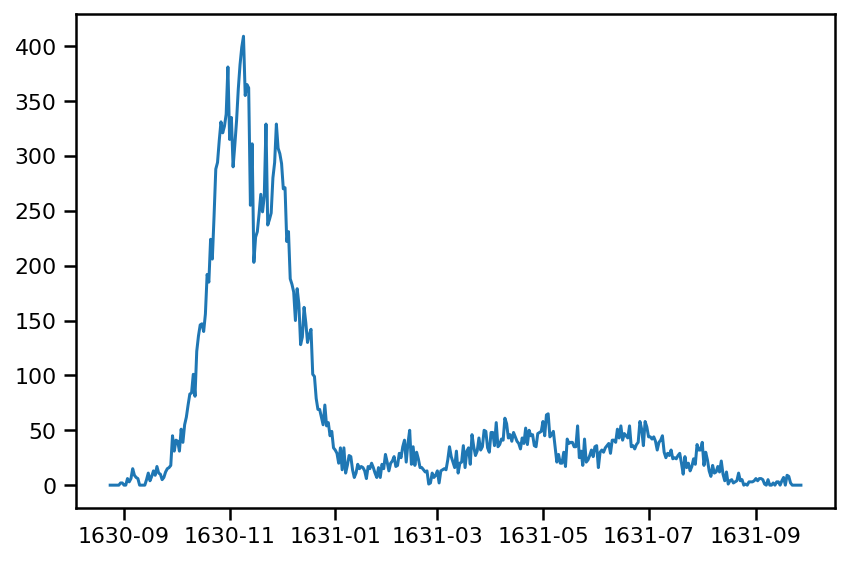

In [32]:
time_w_size = '400_days'  # keep this variable as it will be used to save the plots!
x_to_plot, Vh0, my_xdata, my_ydata = subset_time_win_fun(time_w_size)

# just a double check of the chosen data
print('init. victims for the model Vh0:', Vh0)
plt.plot(x_to_plot, my_ydata)
plt.tight_layout()

define lower and upper bounds for best fit

In [33]:
# bounds for beta and gamma
lower = 0.01
upper = 2

# bounds for trans_time
tt_lower = 100
tt_upper = 300

# bounds for Ih0
lower_Ih0 = 1  #we need at least 1 of course to generate the epidemic
upper_Ih0 = (N - Vh0) / 1000  #theoretical max is (N - Vh0), but we know that the best value is lower...

bounds_TDSIR = [(lower_Ih0, upper_Ih0), (tt_lower, tt_upper), (lower, upper),
                (lower, upper), (lower, upper), (lower, upper)]

### global optim

In [34]:
def cost_fun(my_pars):
    '''
    returns the MSE between fit and data
    '''

    return mean_squared_error(my_ydata, TD_sir(my_xdata, *my_pars))

In [35]:
type_of_fit = 'fits_daily_deaths'

%time evol_results = differential_evolution(cost_fun,bounds=bounds_TDSIR,workers=8)

print(evol_results)

# storing paramters from global fit to be refined with local fit
p0_from_evol_fit = evol_results.x

# re run model with fitted parameters
evol_algo_fit = TD_sir(my_xdata, *evol_results.x)

# assess quality of fit
rfh_r2 = r2_score(y_true=my_ydata, y_pred=evol_algo_fit)
print('R2 on R\'(t):', rfh_r2)

In [37]:
bounds_TDSIR

[(1, 140.0), (100, 300), (0.01, 2), (0.01, 2), (0.01, 2), (0.01, 2)]

In [38]:
[p for p in evol_results.x]

[5.338846703638183,
 148.8115772539857,
 0.9785873023686167,
 0.9079100912393342,
 0.8997193877140786,
 0.7526456018366687]

In [39]:
# compute how 'centered' is each fitted pars, w.r.t imposed bounds
[np.round( (evol_results.x[i] - bounds_TDSIR[i][0]) / (bounds_TDSIR[i][1] - bounds_TDSIR[i][0]) ,3) for i in range(len(bounds_TDSIR))]

[0.031, 0.244, 0.487, 0.451, 0.447, 0.373]

### local optim

In [40]:
%%time

# set tolerance for the norm of the gradient vector:  2.220446049250313e-16 is the min allowed
my_gtol = 1e-15

fit_pars_sir, pars_cov_sir = curve_fit(f=TD_sir,
                                       xdata=my_xdata,
                                       ydata=my_ydata,
                                       p0=p0_from_evol_fit)
#                                        bounds=([lower_Ih0,tt_lower,lower,lower,lower,lower],
#                                                [upper_Ih0,tt_upper,upper,upper,upper,upper]))
#                                        gtol=my_gtol)

CPU times: user 162 ms, sys: 2.45 ms, total: 165 ms
Wall time: 163 ms


run simulations with fitted parameters and compute goodness of the fit 

In [41]:
tdsir_best_fit = TD_sir(my_xdata,*fit_pars_sir)

# just a check that the init. cond. are respected
print(np.round(tdsir_best_fit[0]),my_ydata[0])

current_r2 = r2_score(y_true=my_ydata,y_pred=tdsir_best_fit)
# current_r2 = r2_score(y_true=np.diff(my_ydata),y_pred=np.diff(tdsir_best_fit))

current_r2

5.0 0.0


0.9364105680987613

## plot fitted parameters

reload fitted parameters values ...

In [46]:
fit_pars_sir = pd.read_csv('./fitting_plots/TDsir/baseline_applied/fit_pars_TDsir_400_days.csv',index_col=0)

# in order to match the following code, we keep only the values
fit_pars_sir = fit_pars_sir.fitted_values.values

...and errors 

In [47]:
pars_cov_sir = pd.read_csv('./fitting_plots/TDsir/baseline_applied/pars_cov_TDsir_400_days.csv',index_col=0)

my_yerrs = np.sqrt(np.diag(pars_cov_sir))

### simple plot

fitted parameters:
 ['Ih0', 'trans_time', 'beta1', 'gamma1', 'beta2', 'gamma2']
fitted values:
 [  5.45759266 150.42768633   0.96832056   0.89775115   0.96343374
   0.80580145]
estimation errors:
 [0.17272707 1.57682989 0.00683424 0.00700953 0.03350364 0.02729193]
relative errors (%):
 [3.16489493 1.04823117 0.70578321 0.78078812 3.47752433 3.38693042]


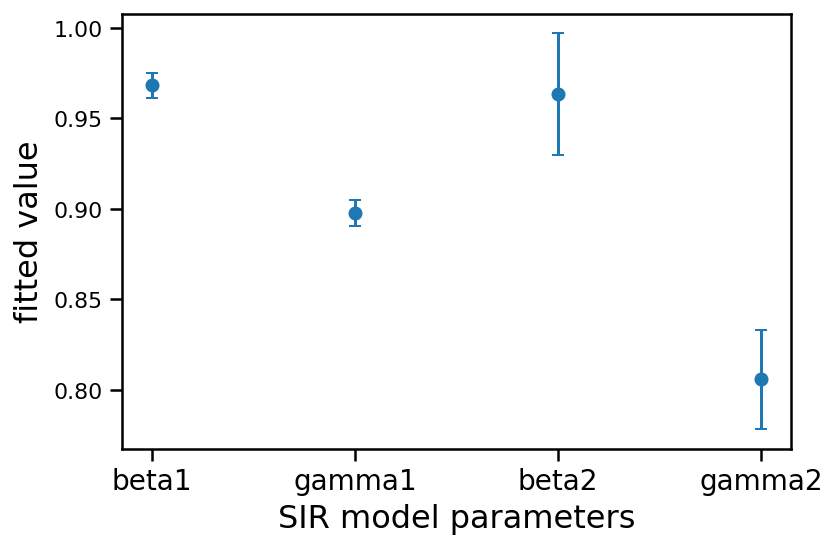

In [48]:
p_to_plot = np.linspace(1,len(fit_pars_sir),len(fit_pars_sir))
my_yerrs = np.sqrt(np.diag(pars_cov_sir))

pars_names = ['Ih0','trans_time','beta1','gamma1','beta2','gamma2']

print('fitted parameters:\n',pars_names)
print('fitted values:\n',fit_pars_sir)
print('estimation errors:\n',my_yerrs)
print('relative errors (%):\n',my_yerrs *100 / fit_pars_sir);

plt.errorbar(x=p_to_plot[2:],y=fit_pars_sir[2:],fmt='o',yerr=my_yerrs[2:],capsize=3)
plt.xticks(p_to_plot[2:],pars_names[2:],size=14)

## plot only beta's and gamma's  
# plt.errorbar(x=p_to_plot[2:],y=fit_pars_sir[2:],fmt='o',yerr=my_yerrs[2:])
# plt.xticks(p_to_plot[2:],['beta1','gamma1','beta2','gamma2'],size=14)

# plt.yscale('log')

plt.ylabel('fitted value',size=16)
plt.xlabel('SIR model parameters',size=16);

save fitted parameters into a file

In [54]:
if_baseline = 'baseline_applied'
name_base = 'fitting_plots/TDsir/' + if_baseline + '/'

In [63]:
# save cov matrix
file_name = name_base + 'pars_cov_TDsir_' + time_w_size + '.csv'
pd.DataFrame(pars_cov_sir,columns=pars_names,index=pars_names).to_csv(file_name)

# save fitted pars values
file_name = name_base + 'fit_pars_TDsir_' + time_w_size + '.csv'
pd.DataFrame(fit_pars_sir,index=pars_names,columns=['fitted_values']).to_csv(file_name)

### plot fitted $\beta(t)$ and $\gamma(t)$ with errors

build array of _fitted values_ for plotting -- this will work for whatever `time_function` of course

In [49]:
[Ih0, trans_time, beta1, gamma1,  beta2, gamma2] = fit_pars_sir
[Ih0_error, trans_time_error, beta1_error, gamma1_error,  beta2_error, gamma2_error] = my_yerrs


beta_fitted = time_function(my_xdata, trans_time, beta1, beta2)
gamma_fitted = time_function(my_xdata, trans_time, gamma1, gamma2)

brn_fitted = beta_fitted / gamma_fitted # basic reproduction num -- R0(t)

print('brn after and before transition:',np.unique(brn_fitted))

brn after and before transition: [1.07860687 1.19562174]


build array of _fitting error_ for plotting

-- mind that this implementatino works only in the simple case we implemented so far `np.heaviside`  ...
indeed, more generally the errors have to be computed with the jacobian of the `time_function`

In [50]:
# construct the errors arrays:
# repeat (trans_time) times error of value1 and (T-trans_time) times error of value2,
# for for error of beta , gamma and their covariance

beta_error = np.repeat(beta1_error, 
                       trans_time + 1)
beta_error = np.append(beta_error,
                       np.repeat(beta2_error,
                                 len(my_xdata) - trans_time))

gamma_error = np.repeat(gamma1_error, 
                        trans_time + 1)
gamma_error = np.append(gamma_error, 
                        np.repeat(gamma2_error,
                                  len(my_xdata) - trans_time))

cov_beta_gamma = np.repeat(pars_cov_sir.iloc[2,3],
                           trans_time + 1)
cov_beta_gamma = np.append(cov_beta_gamma,
                           np.repeat(pars_cov_sir.iloc[4,5],
                                     len(my_xdata) - trans_time))

compute error for $R_{0}$ -- see [error propagation theory](https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas)

In [51]:
def error_R0_fun(sigma_beta, beta, sigma_gamma, gamma, covariance):

    brn = beta / gamma
    return brn * np.sqrt((sigma_beta/beta)**2 + (sigma_gamma/gamma)**2 - \
                     2 * covariance / (beta*gamma))


brn_error = error_R0_fun(beta_error, beta_fitted, gamma_error, gamma_fitted,
                         cov_beta_gamma)

actual plot

In [56]:
# plt.figure(figsize=(8,3))

# plot beta with error
plt.plot(x_to_plot, beta_fitted, label='beta')
plt.fill_between(x_to_plot,
                 beta_fitted - beta_error,
                 beta_fitted + beta_error,
                 alpha=0.2)

# plot gamma with error
plt.plot(x_to_plot, gamma_fitted, label='gamma')
plt.fill_between(x_to_plot,
                 gamma_fitted - gamma_error,
                 gamma_fitted + gamma_error,
                 alpha=0.2)

# plot R0 with error
plt.plot(x_to_plot, brn_fitted, label='R0')
plt.fill_between(x_to_plot,
                 brn_fitted - brn_error,
                 brn_fitted + brn_error,
                 alpha=0.5)

# plot transition-time with error
# plt.fill_betweenx(np.linspace(min(gamma_fitted),max(brn_fitted)),
plt.vlines(x_to_plot[int(trans_time)],0.7,1.3,
           colors='r',linestyles='dashed',label = 'trans. time',)
plt.fill_betweenx(np.linspace(0.7,1.3),
                  x_to_plot[int(trans_time - trans_time_error)],
                  x_to_plot[int(trans_time + trans_time_error)],
                  alpha=0.3)

# plt.xlabel('days', size=16)
# plt.title('Fitted and derived parameters', size=16)

plt.legend(prop={'size': 14})
plt.tight_layout();

plt.savefig('fitting_plots/TDsir/baseline_applied/pars_plot_' + time_w_size + '.pdf')
plt.close()

## plot data VS best fit

In [55]:
# plt.figure(figsize=(10,4))

### -- in case you fit cumulative deaths
# plt.plot(x_to_plot[1:],np.diff(tdsir_best_fit),label='best fit')
# plt.plot(x_to_plot[1:],np.diff(my_ydata),label='data')
# plt.annotate('R2='+ str(np.round(current_r2,4)),
#              xy=(x_to_plot[int(len(x_to_plot)*0.7)],int(max(np.diff(my_ydata))*0.7)),
#              fontsize=16)

plt.plot(x_to_plot,tdsir_best_fit,label='TD-SIR')
plt.plot(x_to_plot,my_ydata,label='data')
plt.annotate('R2='+ str(np.round(current_r2,4)),
             xy=(x_to_plot[int(len(x_to_plot)*0.7)],int(max(my_ydata)*0.7)),
             fontsize=16)

plt.ylabel('daily human deaths',size=16)


plt.legend();
plt.tight_layout();

# my_file_name = time_w_size + '_upper_{}_lower_{}_parameters_bounds'.format(upper,lower)

my_file_name = if_baseline + '/' + 'TDsir' + '_' + if_baseline + '_' + time_w_size
plt.savefig('./fitting_plots/TDsir/' +  my_file_name + '.pdf' )
plt.close()

# EXTRAS 

## Behavioral-beta SIR

this approach __didn't give a good fit__  -- this contains also fig. __SI6e__ from paper

### model definition

custom function for the behavior-dependence of $\beta$

In [147]:
# def behav_beta(infected, beta0, beta1, char_inf_n):
def behav_beta(infected, beta0, char_inf_n):
    
    '''
    returns exponential decay of beta (SIR parameter), 
    as function of number of infected
    '''

#     return beta0 * np.exp(-infected / char_inf_n) + beta1
    
    ## symengine is requited by jitcdde
#     return beta0 * symengine.exp(-infected / char_inf_n) + beta1
    return beta0 * symengine.exp(-infected / char_inf_n)

## ## ## another version, with step function ## ## ## 
#     '''
#     decreasing! step function, at infected <= char_inf_n
#     '''

#     if infected <= char_inf_n:
#         return beta0
#     else:
#         return beta1

#     return beta0 / (char_inf_n + infected) + beta1
## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## 

-  beha. SIR model  from this paper >> https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0023084

-  my time-dependent (TD) SIR

In [140]:
def perra_behav_sir(integr_time, my_Ih0, 
              beta, beta_f, r,
              gamma, gamma_f,
              testing=False):
    '''
    integration of SIR (ODEs system) 
    with transmissibility from 'Perra et al. 2011'

    '''

    #&&** #&&** sub-function that compute derivatives #&&** #&&**
    def sir_sys(y, t):

        ## human vars ##
        Sh = y[0]  #  Number of susceptible humans
        Shf = y[1]  #  Number of susceptible humans with fear!
        Ih = y[2]  #  Number of infected humans
        Vh = y[3]  #  Number of humans victims ('recovered' --> )

        ### ODEs ###
        f0 = -beta * Sh * Ih / N   + gamma_f *  Shf * Sh / N - beta_f * Sh * Ih / N
        f1 =  beta_f * Sh * Ih / N - gamma_f *  Shf * Sh / N - r * beta * Shf / N
        f2 =  beta * Sh * Ih / N - gamma * Ih                + r * beta * Shf / N
        f3 =                       gamma * Ih

        return [f0, f1, f2, f3]

    ### ### need to define init. cond. for integration ###  ###
    # remember that here Ih0 is fitted and Vh0 is given as data input
    Sh0 = N  - Shf0 - my_Ih0 - Vh0

    ds = odeint(
        func=sir_sys, y0=[Sh0, Shf0, my_Ih0, Vh0],
        t=integr_time)  # <<< version where Ih0 is given (not fitted)

    if testing:

        ##return ALL vars - if you are TESTING
        return [ds[:, 0], ds[:, 1], ds[:, 2], ds[:, 3]]

    else:

        ## this is the 3rd eq --> derivative of 'removed'
        return gamma * ds[:, 2]

mind that solving a *delayed* ODE (DDE) is not so trivial...  - here is an [interesting tutorial on DDE](https://reference.wolfram.com/language/tutorial/NDSolveDelayDifferentialEquations.html)

there are dedicated packages for that, such as

- ( https://github.com/hensing/PyDDE -- no docs! -.-)

- [jitcdde](https://github.com/neurophysik/jitcdde) >> [which requires `gcc`!](https://stackoverflow.com/a/52558100/5533078)
-- following [this example](https://stackoverflow.com/questions/42632523/solve-ode-in-python-with-a-time-delay) 


In [141]:
from jitcdde import t, y, jitcdde
import symengine

# from jitcdde import test

mind that here we use `integrate_blindly` to avoid warning during the fitting -- but one has to be careful with the integration! -- see comments [in the issue](https://github.com/neurophysik/jitcdde/issues/26)

In [142]:
def delayed_behav_sir(integr_time,
                      my_Ih0,
                      my_beta0,
                      my_slope,
                      my_tau,
                      gamma,
                      testing=False):
    #                           my_beta1,
    '''
    integration of SIR (ODEs system) with transmissibility beta including 
    a simple model of 'fear'  (exponential decay with N deaths)
    parameters > see behav_beta  
    '''
    def sir_sys(my_y, my_t):

        ## human vars ##
        Sh = my_y(0)  #  Number of susceptible humans
        Ih = my_y(1)  #  Number of infected humans
        Vh = my_y(2)  #  Number of humans victims

        # compute behav-dep. beta
        Ih_del = my_y(1, my_t - my_tau)  #  time-delayed Number of infected humans
        #beta = behav_beta(Ih_del, my_beta0, my_beta1, my_slope)
        beta = behav_beta(Ih_del, my_beta0, my_slope)

        ### ODEs ###
        f0 = -beta * Sh * Ih / N
        f1 = beta * Sh * Ih / N - gamma * Ih
        f2 = gamma * Ih

        return [f0, f1, f2]

    # initialising the integrator
    DDE = jitcdde(sir_sys(y, t), verbose=False)

    # enter initial conditions
    Sh0 = N - my_Ih0 - Vh0
    #     DDE.add_past_point(-1.0, [Sh0,my_Ih0,Vh0], [0.0, 0.0, 0.0])
    DDE.constant_past([Sh0, my_Ih0, Vh0], 0.0)

    # short pre-integration to take care of discontinuities
    DDE.step_on_discontinuities()

    # create timescale
    times = DDE.t + my_xdata

    # integrating
    data = []
    for time in times:
        data.append(DDE.integrate_blindly(time))

    data = pd.DataFrame(data)

    ### ### what to return ### ###
    if testing:
        ##return ALL vars - if you are TESTING
        return data

    else:

        # skip bad results, in case integration fails
        if data.isnull().sum().sum() != 0:

            return 1 + np.zeros(my_xdata.shape)

        else:
            ## this is the 3rd eq --> derivative of 'removed'
            return gamma * data.iloc[:, 1]

### testing  SIR before fit

choose the __time-window__ of the data we want to fit

init. victims for the model Vh0: 0


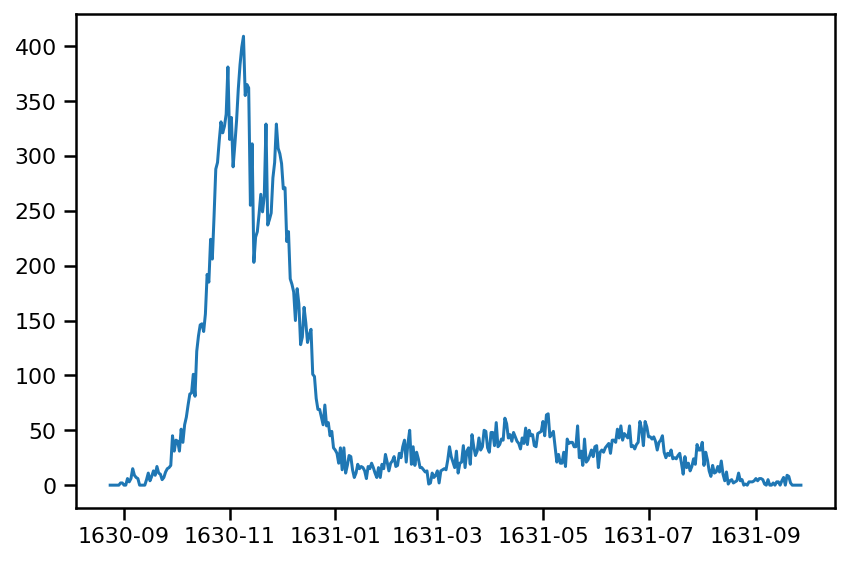

In [145]:
time_w_size = '400_days'  # keep this variable as it will be used to save the plots!
x_to_plot, Vh0, my_xdata, my_ydata = subset_time_win_fun(time_w_size)

# just a double check of the chosen data
print('init. victims for the model Vh0:', Vh0)
plt.plot(x_to_plot, my_ydata)
plt.tight_layout()

#### Perra beha. SIR 

CPU times: user 5.49 ms, sys: 87 µs, total: 5.58 ms
Wall time: 5.55 ms


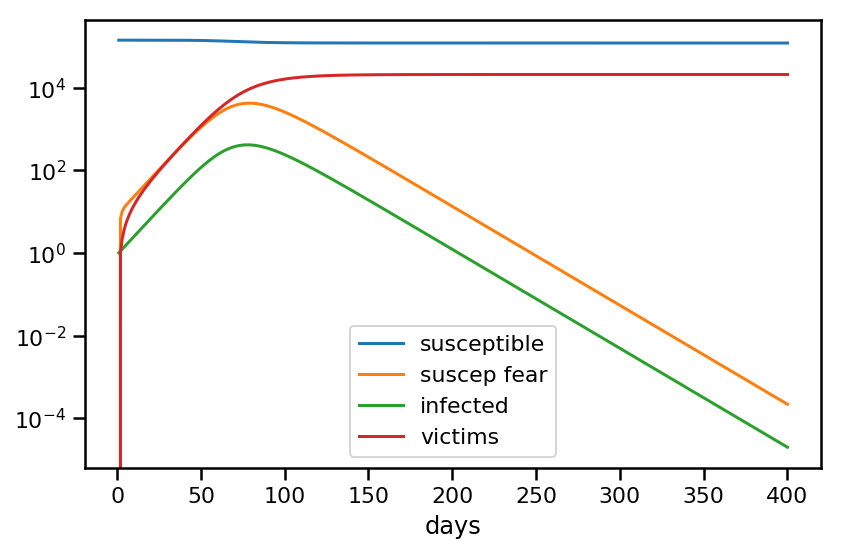

In [166]:
# set parameters -- in the order of fit
Shf0 = 0
test_Ih0 = p0_from_evol_fit[0]
test_beta = p0_from_evol_fit[1]
test_beta_f = p0_from_evol_fit[2]
test_r = p0_from_evol_fit[3]
test_gamma = p0_from_evol_fit[4]
test_gamma_f = p0_from_evol_fit[5]

# run the simulation
%time outputs_simple_sir = perra_behav_sir(my_xdata,testing=True,\
                                           my_Ih0=test_Ih0,\
                                           beta=test_beta,beta_f=test_beta_f,\
                                           r=test_r,\
                                           gamma=test_gamma,gamma_f=test_gamma)

# plot the results
plt.plot(my_xdata, outputs_simple_sir[0], label='susceptible')
plt.plot(my_xdata, outputs_simple_sir[1], label='suscep fear')
plt.plot(my_xdata, outputs_simple_sir[2], label='infected')
plt.plot(my_xdata, outputs_simple_sir[3], label='victims')

plt.legend()
plt.yscale('log')
plt.xlabel('days')
plt.tight_layout()

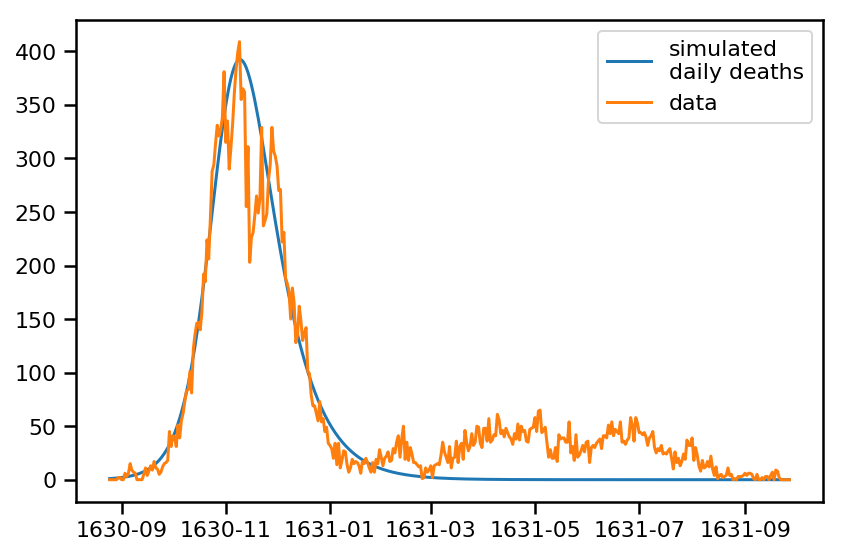

In [162]:
plt.plot(
    x_to_plot[1:],
    np.diff(outputs_simple_sir[3]),
    label='simulated\ndaily deaths')
plt.plot(x_to_plot[1:], my_ydata[1:], label='data')

plt.legend()
plt.xlabel('')
plt.tight_layout()

# plt.savefig('fitting_plots/behav_sir/simulated_daily_deaths.pdf')

 multi peaks search

In [111]:
n_time_points = my_xdata.shape[0]
test_x = np.linspace(0,n_time_points,n_time_points)

def peak_cost_fun(my_pars):
    
#     pred = behav_sir(my_xdata,*my_pars)
    pred = perra_behav_sir(test_x,*my_pars)
    
    # non-0 prominence is necessary to avoid spourious peaks due to machine precision 
    n_peaks = find_peaks(pred,prominence=1)[0].shape[0]    
    
    return - n_peaks

In [211]:
# bounds for beta and gamma
lower = 1e-1
upper = 5

# bounds for r
lower_r = 1e-2
upper_r = 1


# ... and for Ih0 << in principle this should be integer...but let's neglect it for now -- still better than imposing it externally
lower_Ih0 = 1  #we need at least 1 of course to generate the epidemic
upper_Ih0 = 1  #(N - Vh0)/1000 #theoretical max is (N - Vh0), but we know that the best value is lower...

bounds_perra_behavSIR = [(lower_Ih0, upper_Ih0),
                         (lower, upper), (lower, upper),
                         (lower_r, upper_r),
                         (lower, upper),(lower, upper)]

In [212]:
# %time brute_results = brute(peak_cost_fun,bounds_behavSIR,full_output=True,workers=-1,Ns=10)

%time evol_results = differential_evolution(peak_cost_fun,bounds=bounds_perra_behavSIR,workers=-1)

print(evol_results)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/_differentialevolution.py:461: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  " updating='deferred'", UserWarning)


CPU times: user 318 ms, sys: 41.6 ms, total: 360 ms
Wall time: 9.73 s
     fun: -6.0
 message: 'Optimization terminated successfully.'
    nfev: 4057
     nit: 44
 success: True
       x: array([1.        , 2.44905494, 4.77927179, 0.02537271, 0.13025126,
       0.60772973])


n_peaks 6


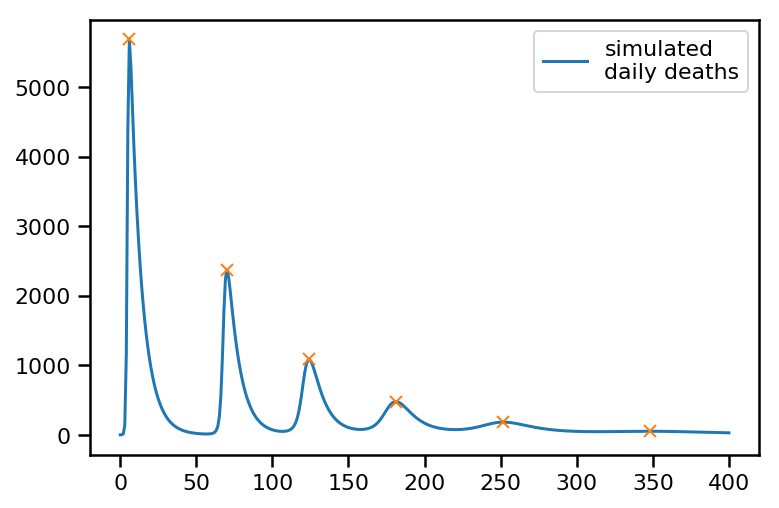

In [226]:
pred = perra_behav_sir(test_x,*evol_results.x)
peaks, _ = find_peaks(pred)
print('n_peaks',len(peaks))

plt.plot(test_x,pred,
        label='simulated\ndaily deaths')
plt.plot(test_x[peaks], pred[peaks], "x")
plt.legend();

my_file_name = 'max_peak_num_upper_{}_lower_{}_betagamma_bounds'.format(upper,lower)
plt.savefig('./fitting_plots/perra_behav_sir/' + my_file_name + '.pdf' )

In [223]:
print("R0 = beta / gamma = ", evol_results.x[1] / evol_results.x[4])
print("R0f = beta_f / gamma_f =", evol_results.x[2] / evol_results.x[5])

R0 = beta / gamma =  18.802542875448616
R0f = beta_f / gamma_f = 7.864140124094852


#### delayed beh. SIR

In [ ]:
N = 14e4
R0 = 1.7

# set parameters -- in the order of fit
# test_N = 91e3 # p0_from_evol_fit[0]
test_Ih0 = 1  # p0_from_evol_fit[1] #1

# test_beta1 = 0.05 # p0_from_evol_fit[3]
test_slope = 30 # p0_from_evol_fit[4]
test_gamma = 0.2  # p0_from_evol_fit[5]
# test_beta0 = 1  # 100 # p0_from_evol_fit[2]
# test_beta1 = 0.2
test_tau = 50                               ### ~regulates distance among peaks
test_beta0 = R0 * test_gamma  # 100 # p0_from_evol_fit[2]

# 'The time you integrate with this should be larger than your largest delay.'
# my_xdata = np.linspace(test_tau + 1,my_ydata.shape[0],int(my_ydata.shape[0] / test_tau - 1))

# run the simulation

### my_beta1=test_beta1,\
%time outputs_delayed_sir = delayed_behav_sir(my_xdata,testing=True,\
                                              my_Ih0=test_Ih0,\
                                              my_beta0=test_beta0,\
                                              my_slope=test_slope,\
                                              my_tau=test_tau,\
                                              gamma=test_gamma)

outputs_delayed_sir.iloc[:, 2].diff().plot();

### run SIR fit

reload data -- with _baseline removed_

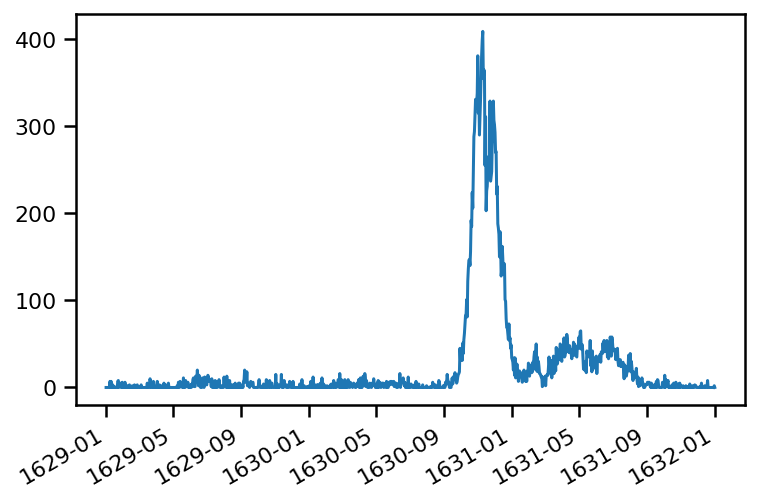

In [149]:
data_for_fit = pd.read_csv('dataset/city_cases_baseline_removed.csv',
                           index_col=0,
                           infer_datetime_format=True)

# we always have to fix index, unfortunately...
data_for_fit.index = good_index_fun(data_for_fit.shape[0])

# transform to a series
data_for_fit = pd.Series(data_for_fit.shifted)

# re-check loaded data
data_for_fit.plot();

choose the __time-window__ of the data we want to fit

init. victims for the model Vh0: 0


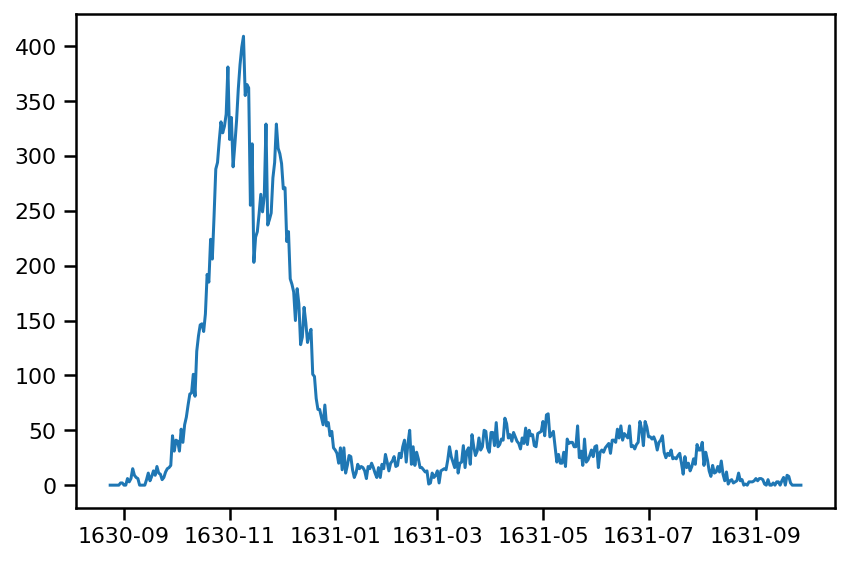

In [150]:
time_w_size = '400_days'  # keep this variable as it will be used to save the plots!
x_to_plot, Vh0, my_xdata, my_ydata = subset_time_win_fun(time_w_size)

# just a double check of the chosen data
print('init. victims for the model Vh0:', Vh0)
plt.plot(x_to_plot, my_ydata)
plt.tight_layout()

define lower and upper bounds for best fit -- we use some heuristics to improve the boundaries, given that the best fit is sensitive to that...--

In [151]:
# ... and for Ih0 << in principle this should be integer...but let's neglect it for now -- still better than imposing it externally
lower_Ih0 = 1  #we need at least 1 of course to generate the epidemic
upper_Ih0 = 5  #(N - Vh0)/1000 #theoretical max is (N - Vh0), but we know that the best value is lower...


# bounds for beta 
lower_beta = 0.05
upper_beta = 0.5

## ## ## ## extra pars for Perra model ## ## ## ## 
# bounds for gamma_f
# lower_gamma_f = 5
# upper_gamma_f = 20
# bounds for beta_f
# lower_beta_f = 90
# upper_beta_f = 200
# bounds for r
# lower_r = 5
# upper_r = 20
## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## 

## ## ## ## extra pars for delayed model -- DDE ## ## ## ## 
lower_slope = 20
upper_slope = 70

lower_tau = 10
upper_tau = 60
## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## 

# bounds for beta 
lower_gamma = 0.01
upper_gamma = 0.1

# bounds_perra_behavSIR = 
bounds_delayed_behavSIR = [(lower_Ih0, upper_Ih0) ,(lower_beta, upper_beta), (lower_slope,upper_slope),
                           (lower_tau,upper_tau), (lower_gamma,upper_gamma)]
#                            (lower_beta, upper_beta),

In [152]:
from sklearn.metrics import mean_absolute_error

In [153]:
def cost_fun(my_pars):

    #     return mean_squared_error(my_ydata,perra_behav_sir(my_xdata,*my_pars))
    #     return mean_squared_error(my_ydata_smoothed,perra_behav_sir(my_xdata,*my_pars))

    #     return mean_absolute_error(my_ydata,perra_behav_sir(my_xdata,*my_pars))
    return mean_squared_error(my_ydata, delayed_behav_sir(my_xdata, *my_pars))

there are also other  optimization libraries -- e.g.

https://github.com/Project-Platypus/Platypus

http://esa.github.io/pygmo/index.html


In [154]:
### ### # other initial conditions ### ### 
N = 14e4
# Shf0 = 0

# here we set the boundaries as centered around 'decent' values explored before by hand

In [ ]:
# pars_0 = [test_Ih0,test_beta0,test_slope,test_tau,test_gamma]
pars_0 = p0_from_evol_fit

delta_fraction = 0.5
bounds_delayed_behavSIR = [(par * (1 - delta_fraction),par * (1 + delta_fraction)) for par in pars_0]
bounds_delayed_behavSIR

In [ ]:
# %time evol_results = differential_evolution(cost_fun,bounds=bounds_perra_behavSIR,workers=-1) # tol=0.001)
%time evol_results = differential_evolution(cost_fun,bounds=bounds_delayed_behavSIR,\
                                            workers=-1,disp=True,polish=False,tol=0.1) # 

print(evol_results)

In [ ]:
### ### storing paramters from global fit to be refined with local fit
# p0_from_evol_fit = evol_results.x
p0_from_evol_fit = [1.93618756e-02, 1.38132437e-01, 2.85456824e+01, 6.78806032e+01, 3.12949817e-02]

### ### assess best fit

# evol_algo_fit = perra_behav_sir(my_xdata, *evol_results.x)
# evol_algo_fit = delayed_behav_sir(my_xdata, *evol_results.x)
evol_algo_fit = delayed_behav_sir(my_xdata, *p0_from_evol_fit)

behavSIR_r2 = r2_score(y_true=my_ydata, y_pred=evol_algo_fit)
print('R2 on R\'(t):', behavSIR_r2)

In [87]:
# compute how 'centered' is each fitted pars, w.r.t imposed bounds
[
    np.round((evol_results.x[i] - bounds_delayed_behavSIR[i][0]) /
             (bounds_delayed_behavSIR[i][1] - bounds_delayed_behavSIR[i][0]), 3)
    for i in range(len(bounds_delayed_behavSIR))
]

[1.085, 330.581, -0.38, -0.182, 9.886]

In [ ]:
# %%time

# set tolerance for the norm of the gradient vector:  2.220446049250313e-16 is the min allowed
# my_gtol = 1e-15

fit_pars_sir, pars_cov_sir = curve_fit(f=perra_behav_sir,xdata=my_xdata,ydata=my_ydata,
                                       p0=p0_from_evol_fit)

# run simulations with fitted parameters and compute goodness of the fit 
behavsir_best_fit = perra_behav_sir(my_xdata,*fit_pars_sir)

# just a check that the init. cond. are respected
print(np.round(behavsir_best_fit[0]),my_ydata[0])

behavSIR_r2 = r2_score(y_true=my_ydata,y_pred=behavsir_best_fit)

print(behavSIR_r2)
fit_pars_sir

In [15]:
fit_pars_sir = p0_from_evol_fit

### plot fitted parameters

In [ ]:
p_to_plot = np.linspace(1, len(fit_pars_sir), len(fit_pars_sir))
# my_yerrs = np.sqrt(np.diag(pars_cov_sir))

# pars_names = ['Ih0','beta1', 'beta2', 'slope','gamma']
# pars_names = ['Ih0','beta', 'beta_f','r','gamma','gamma_f']
pars_names = ['Ih0','beta', 'slope','tau','gamma']
# pars_names = ['Ih0', 'beta0', 'beta1', 'slope', 'tau', 'gamma']

print('fitted parameters:\n', pars_names)
print('rounded fitted values:\n', np.round(fit_pars_sir, 3))
# print('estimation errors:\n',my_yerrs)
# print('relative errors (%):\n',my_yerrs *100 / fit_pars_sir);

plt.errorbar(x=p_to_plot, y=fit_pars_sir, fmt='o')  #,yerr=my_yerrs,capsize=3)
plt.xticks(p_to_plot, pars_names, size=14)

## plot only beta's and gamma's
# plt.errorbar(x=p_to_plot,y=fit_pars_sir,fmt='o',yerr=my_yerrs)
# plt.xticks(p_to_plot,['beta1','gamma1','beta2','gamma2'],size=14)

# plt.yscale('log')

plt.ylabel('fitted value', size=16)
plt.xlabel('behav. SIR model parameters', size=16);

save fitted parameters into a file

In [50]:
# # save cov matrix
# if_baseline = 'baseline_applied'
# name_base = 'fitting_plots/behav_sir/' 
name_base = 'fitting_plots/delayed_behav_sir/'

# file_name = name_base + 'pars_cov_behavSIR_' + time_w_size + '.csv'
# pd.DataFrame(pars_cov_sir,columns=pars_names,index=pars_names).to_csv(file_name)

# # save fitted pars values
# file_name = name_base + 'fit_pars_behavSIR_' + time_w_size + '.csv'
file_name = name_base + 'fit_pars_behav_delayed_SIR_' + time_w_size + '.csv'
pd.DataFrame(fit_pars_sir,index=pars_names,columns=['fitted_values']).to_csv(file_name)

build array of _fitted values_ for plotting 

In [51]:
[N, Ih0, beta1, beta2, slope, gamma] = fit_pars_sir
# [Ih0_error, trans_time_error, beta1_error, gamma1_error,  beta2_error, gamma2_error] = my_yerrs

I_to_plot = np.linspace(1, 1.5 * slope)
beta_fitted = behav_beta(I_to_plot, beta1, beta2, slope)
brn_fitted = beta_fitted / gamma  # basic reproduction num -- R0(t)

plot $\beta(R)$

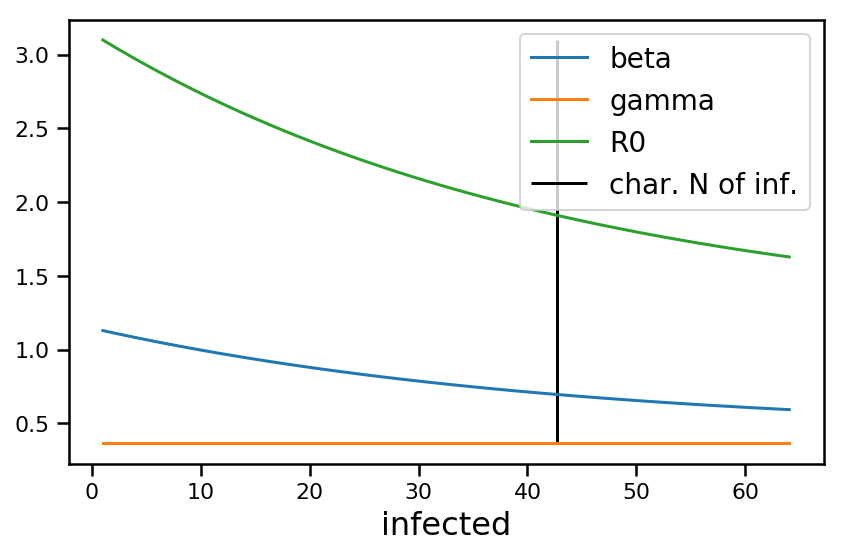

In [52]:
# plt.figure(figsize=(8,3))

# plot beta with error
plt.plot(I_to_plot, beta_fitted, label='beta')
# plt.fill_between(I_to_plot,
#                  beta_fitted - beta_error,
#                  beta_fitted + beta_error,
#                  alpha=0.2)

# plot gamma with error
plt.plot(I_to_plot, np.repeat(gamma, I_to_plot.shape), label='gamma')
# plt.fill_between(I_to_plot,
#                  gamma - gamma_error,
#                  gamma + gamma_error,
#                  alpha=0.2)

# plot R0 with error
plt.plot(I_to_plot, brn_fitted, label='R0')
# plt.fill_between(I_to_plot,
#                  brn_fitted - brn_error,
#                  brn_fitted + brn_error,
#                  alpha=0.5)

# plot exp. slope
plt.vlines(
    slope,
    max([*brn_fitted,gamma,*beta_fitted]),
    min([*brn_fitted,gamma,*beta_fitted]),
    label='char. N of inf.')

plt.xlabel('infected', size=16)
# plt.title('Fitted and derived parameters', size=16)

plt.legend(prop={'size': 14})
plt.tight_layout()

# plt.savefig('fitting_plots/behav_sir/pars_plot_' + time_w_size + '.pdf')
# plt.close()

### plot data VS best fit

In [26]:
my_file_name = [str(par[0]) + '_' + str(par[1]) for par in bounds_delayed_behavSIR]

separator = '_'

separator.join(my_file_name)

'1_5_0.05_0.5_20_70_10_60_0.01_0.1'

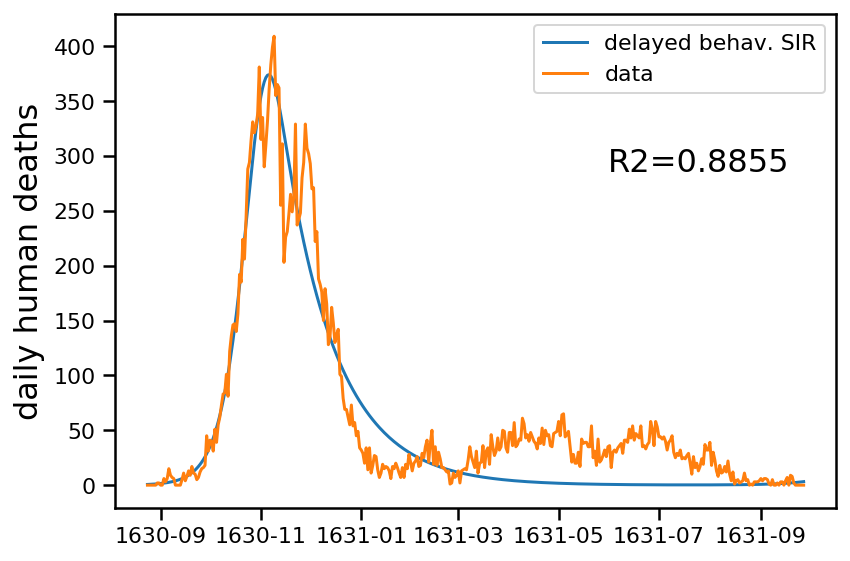

In [17]:
# plt.figure(figsize=(10,4))

plt.plot(x_to_plot, evol_algo_fit, label='delayed behav. SIR')
# plt.plot(x_to_plot,cma_fit,label='behav-SIR')
plt.plot(x_to_plot, my_ydata, label='data')

plt.annotate('R2=' + str(np.round(behavSIR_r2, 4)),
             xy=(x_to_plot[int(len(x_to_plot) * 0.7)],
                 int(max(my_ydata) * 0.7)),
             fontsize=16)

# plt.plot(my_xdata,evol_algo_fit,label='behav-SIR')
# plt.plot(my_xdata,my_ydata_smoothed,label='smoothed data')

plt.ylabel('daily human deaths', size=16)

plt.legend()
plt.tight_layout()

# my_file_name = time_w_size + '_upper_{}_lower_{}_betagamma_bounds'.format(upper,lower)
# plt.savefig('./fitting_plots/behav_sir/' + my_file_name + '.pdf' )

plt.savefig('./fitting_plots/delayed_behav_sir/' + time_w_size +
            '_bestfit_delayed_SIR.pdf')
# plt.close()

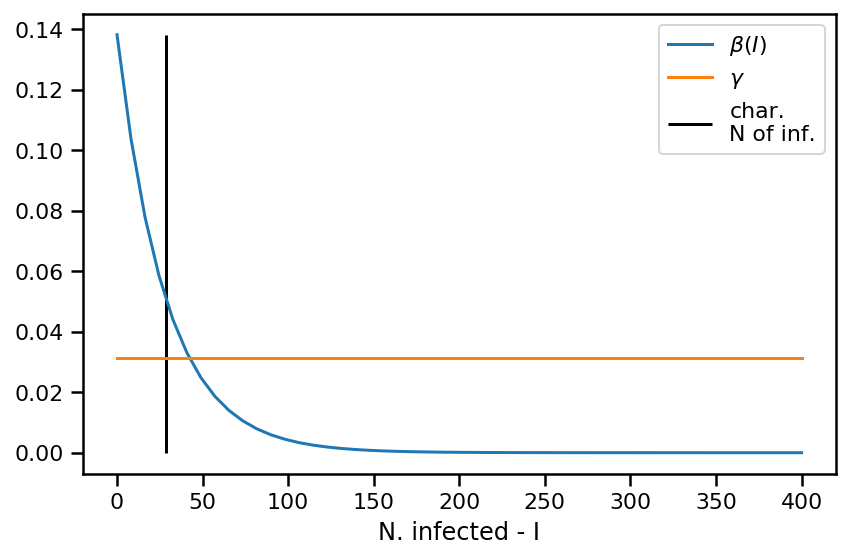

In [52]:
# [test_Ih0, test_beta0, test_beta1, test_slope, test_tau, test_gamma] = p0_from_evol_fit
[test_Ih0, test_beta0, test_slope, test_tau, test_gamma] = p0_from_evol_fit

test_inf = np.linspace(0, 400)

beta_to_plot = [behav_beta(i, test_beta0, test_slope) for i in test_inf]

# plt.plot(test_inf,[behav_beta(i, test_beta0, test_beta1, test_slope) for i in test_inf])
plt.plot(test_inf, beta_to_plot, label=r'$\beta(I)$')
plt.plot(test_inf, np.repeat(test_gamma, test_inf.shape), label=r'$\gamma$')
# plt.plot(test_inf, np.array(beta_to_plot)/test_gamma, label=r'$\beta / \gamma$')

plt.vlines(test_slope,
           max([*beta_to_plot, test_gamma]),
           min([*beta_to_plot, test_gamma]),
           label='char.\nN of inf.')

plt.legend()
# plt.yscale('log')
plt.xlabel('N. infected - I');
# plt.ylabel(r'$\beta(I)$');

plt.tight_layout()
plt.savefig('fitting_plots/delayed_behav_sir/pars_plot_' + time_w_size + '.pdf')

## Many-years dynamics

this section is presented  for further exploration of the model, but they are not present in the paper

function for plotting all integrated variables

In [ ]:
many_years = np.linspace(start=0, stop=10, num=10**3)

type_of_fit='all_vars'

F0,F1,F2,F3,F4,F5,F6,F7,F8 = integration_fun(integr_time=many_years,my_Ir0=2e4,my_Ih0=10,\
                                             r=r0,Kr=Kr0,br=br0,Z=Z0,rr=rr0,rf=rf0,\
                                             Kf=Kf0,df=df0,bh=bh0,rh=rh0,ph=ph0)

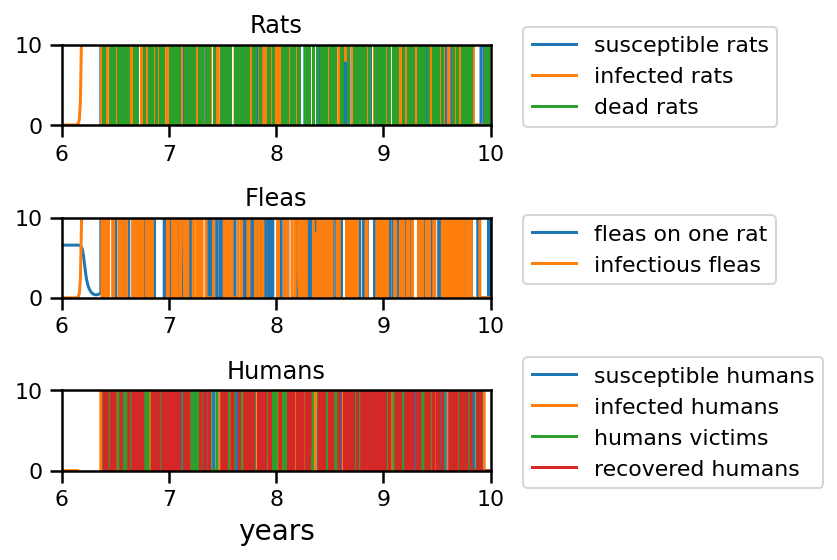

In [236]:
all_var_plot_fun(many_years,[F0,F1,F2,F3,F4,F5,F6,F7,F8])

# plt.savefig('./fitting_plots/some_other_trials/immune_rats_trial.pdf')
# plt.savefig('./fitting_plots/multi_year_dyn/all_p0_given.pdf')

In [235]:
def all_var_plot_fun(plot_x, plot_y):

    f, (ax1, ax2, ax3) = plt.subplots(3)

    # plotting rats vars
    ax1.title.set_text('Rats')
    ax1.plot(plot_x, plot_y[0], label='susceptible rats')
    ax1.plot(plot_x, plot_y[1], label='infected rats')
    ax1.plot(plot_x, plot_y[2], label='dead rats ')
    #     ax1.set_yscale('log')
    ax1.set_xlim([6,10])
    ax1.set_ylim([0, 10])

    # doc for legend position -  https://matplotlib.org/api/legend_api.html
    ax1.legend(bbox_to_anchor=(1.05, 0.6), loc=6)

    # plotting fleas vars
    ax2.title.set_text('Fleas')
    ax2.plot(plot_x, plot_y[3], label='fleas on one rat')
    ax2.plot(plot_x, plot_y[4], label='infectious fleas')
    #     ax2.set_yscale('log')
    ax2.set_xlim([6,10])
    ax2.set_ylim([0, 10])

    ax2.legend(bbox_to_anchor=(1.05, 0.6), loc=6)

    # plotting humans vars
    ax3.title.set_text('Humans')
    ax3.plot(plot_x, plot_y[5], label='susceptible humans')
    ax3.plot(plot_x, plot_y[6], label='infected humans')
    ax3.plot(plot_x, plot_y[7], label='humans victims')
    ax3.plot(plot_x, plot_y[8], label='recovered humans')
    #     ax3.set_yscale('log')
    ax3.set_xlim([6,10])
    ax3.set_ylim([0, 10])

    # plotting data
    # ax3.plot(plot_x,my_ydata],label='deaths data')

    ax3.legend(bbox_to_anchor=(1.05, 0.6), loc=6)

    plt.xlabel('years', size=14)
    plt.tight_layout()

    # plt.legend(loc='center right',bbox_to_anchor=(1.5, 0.5));